## DATA MINING PROJECT
# ABCDEats Inc\. Final Report

**Group 20** <br>
Afonso Gamito, 20240752 <br>
Gonçalo Pacheco, 20240695 <br>
Hassan Bhatti, 20241023 <br>
Moeko Mitani, 20240670

# Import the Libraries and CVS file

In [3]:
import pandas as pd
import sqlite3
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from math import ceil

from itertools import product

In [4]:
df = pd.read_csv('/Users/goncalopacheco/Documents/GitHub/DataMiningProject/project_data/DM2425_ABCDEats_DATASET.csv', sep=',')

# 1. Check the DataFrame

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Metadata

The training set contains the customer data from ABCDEats Inc. collected over three months from three cities.

| Feature | Feature description |
|---------|---------------------|
| *customer_id* | Unique identifier for each customer.|
| *customer_region* | Geographic region where the customer is located.|
| *customer_age* | Age of the customer.|
| *vendor_count* | Number of unique vendors the customer has ordered from.|
| *product_count* | Total number of products the customer has ordered.|
| *is_chain* | Indicates whether the customer’s order was from a chain restaurant.|
| *first_order* | Number of days from the start of the dataset when the customer first placed an order.|
| *last_order* | Number of days from the start of the dataset when the customer most recently placed an order.|
| *last_promo* | The category of the promotion or discount most recently used by the customer.|
| *payment_method* | Method most recently used by the customer to pay for their orders.|
| *CUI_American* | The amount in monetary units spent by the customer from the American cuisine.|
| *CUI_Asian* | The amount in monetary units spent by the customer from the Asian cuisine.|
|*CUI_Beverages* | The amount in monetary units spent by the customer from the Beverages|
| *CUI_Cafe* | The amount in monetary units spent by the customer from the Cafe.|
| *CUI_Chicken Dishes* | The amount in monetary units spent by the customer from the Chicken Dishes.|
| *CUI_Chinese* | The amount in monetary units spent by the customer from the Chinese cuisine.|
| *CUI_Desserts* | The amount in monetary units spent by the customer from the Desserts.|
| *CUI_Healthy* | The amount in monetary units spent by the customer from the Healthy cuisine.|
| *CUI_Indian* | The amount in monetary units spent by the customer from the Indian cuisine.|
| *CUI_Italian* | The amount in monetary units spent by the customer from the Italian cuisine.|
| *CUI_Japanese* | The amount in monetary units spent by the customer from the Japanese cuisine.|
| *CUI_Noodle Dishes* | The amount in monetary units spent by the customer from the Noodle Dishes.|
| *CUI_OTHER* | The amount in monetary units spent by the customer from the Other cuisine.|
| *CUI_Street Food / Snacks* | The amount in monetary units spent by the customer from the Street Food / Snacks.|
| *CUI_Thai* | The amount in monetary units spent by the customer from the Thai cuisine.|
| *DOW_0* | Number of orders placed on each day of Sunday.|
| *DOW_1* | Number of orders placed on each day of Monday.|
| *DOW_2* | Number of orders placed on each day of Tuesday.|
| *DOW_3* | Number of orders placed on each day of Wednesday.|
| *DOW_4* | Number of orders placed on each day of Thursday.|
| *DOW_5* | Number of orders placed on each day of Friday.|
| *DOW_6* | Number of orders placed on each day of Saturday.|
| *HR_0* | Number of orders placed during 12AM.|
| *HR_1* | Number of orders placed during 1AM.|
| *HR_2* | Number of orders placed during 2AM.|
| *HR_3* | Number of orders placed during 3AM.|
| *HR_4* | Number of orders placed during 4AM.|
| *HR_5* | Number of orders placed during 5AM.|
| *HR_6* | Number of orders placed during 6AM.|
| *HR_7* | Number of orders placed during 7AM.|
| *HR_8* | Number of orders placed during 8AM.|
| *HR_9* | Number of orders placed during 9AM.|
| *HR_10* | Number of orders placed during 10AM.|
| *HR_11* | Number of orders placed during 11AM.|
| *HR_12* | Number of orders placed during 12PM.|
| *HR_13* | Number of orders placed during 1PM.|
| *HR_14* | Number of orders placed during 2PM.|
| *HR_15* | Number of orders placed during 3PM.|
| *HR_16* | Number of orders placed during 4PM.|
| *HR_17* | Number of orders placed during 5PM.|
| *HR_18* | Number of orders placed during 6PM.|
| *HR_19* | Number of orders placed during 7PM.|
| *HR_20* | Number of orders placed during 8PM.|
| *HR_21* | Number of orders placed during 9PM.|
| *HR_22* | Number of orders placed during 10PM.|
| *HR_23* | Number of orders placed during 11PM.|

# 2. Treat Missing Values
## Remarks from first delivery
- **'customer_age'**: 727 (NaN)
- **'first_order'**: 106 (NaN)
- **'HR_0'**: 1165 (NaN)
- **'customer_region'**: 442 (-)
- **'last_promo'**: 16748 (-) --> Exaggerated number of missing values. It need to consider about this later.

In [10]:
df.shape

(31888, 56)

In [11]:
df.isna().sum()

customer_id                    0
customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5     

In [24]:
# Fill missing values in customer age with its median
df["customer_age"] = df["customer_age"].fillna(df["customer_age"].median())

In [25]:
# Fill missing values in first_order with its median
df["first_order"] = df["first_order"].fillna(df["first_order"].median())

In [26]:
# Check HR_0 
df["HR_0"].unique()

array([0.])

In [27]:
# Fill missing values in HR_0 with its median
df["HR_0"] = df["HR_0"].fillna(df["HR_0"].fillna(0))

In [ ]:
# Check customer_regio
df["customer_region"].unique()

array(['2360', '8670', '4660', '2440', '-', '4140', '2490', '8370',
       '8550'], dtype=object)

In [ ]:
# Check customer_region
df["customer_region"].value_counts()

customer_region
8670    9761
4660    9550
2360    8829
2440    1483
4140     857
8370     495
2490     445
-        442
8550      26
Name: count, dtype: int64

From the visualization, "-" seems like to be able to be considered as City C (starting with 8000). Thus, we can fill the missing value "-" with "8" for now since we will merge it with "8670", "8370" and "8550".

In [37]:
# Fill missing values "-" in customer_region with 8000
df["customer_region"] = df["customer_region"].replace("-", 8000)

In [38]:
# Check customer_region
df["customer_region"].value_counts()

customer_region
8670    9761
4660    9550
2360    8829
2440    1483
4140     857
8370     495
2490     445
8000     442
8550      26
Name: count, dtype: int64

In [ ]:
# Check last_promo
df["last_promo"].value_counts()

last_promo
-           16748
DELIVERY     6286
DISCOUNT     4496
FREEBIE      4358
Name: count, dtype: int64

Since there are 16748 of "-" in last_promo, we decided to rename it to "UNKNOWN" for now. Additionally, we might drop the feature itself later.

In [42]:
# Fill missing values "-" in last_prom with UNKNOWN
df["last_promo"] = df["last_promo"].replace("-", "UNKNOWN")

In [43]:
# Check last_promo
df["last_promo"].value_counts()

last_promo
UNKNOWN     16748
DELIVERY     6286
DISCOUNT     4496
FREEBIE      4358
Name: count, dtype: int64

# 4. Change the dtype
## Remarks
- **'customer_region'** should be int instead of obj.
- **'customer_age'** should be int instead of float.
- **vendor_count** should be bool instead of int.
- **'first_order'** should be int instead of float.
- **'HR_0'** should be int instead of float.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

# 5. Outliers
### Remarks for Outliers in Cuisine Orders and All Hours Outliers:
- This figure presents boxplots for each cuisine and hours metric, highlighting outliers in the order counts.
- Box plots are chosen for their effectiveness in visualizing the distribution of data and identifying outliers.
- The use of a consistent gray color allows for a cohesive and professional look.
- This visualization assists in understanding the variability of order counts across different cuisines and hours, and identifying any extreme values.

### Remarks for Vendor Count:
- This box plot visualizes the distribution of vendor counts across the dataset.
- It highlights the median, quartiles, and potential outliers in vendor count values,
- allowing for a clear understanding of vendor count variability.

### Remarks for Product Count:
- This box plot illustrates the distribution of product counts within the dataset.
- It shows the central tendency, variability, and any outliers in product counts.
- Providing insights into how product availability varies across vendors.

### Remarks for Customer Age:
- This box plot represents the distribution of customer ages in the dataset.
- It highlights the median age, the interquartile range, and any potential outliers.
- Offering insights into the age demographics of customers interacting with the vendors.

### Define metric and non-metric features. 

In [15]:
# Define the list of non-metric features
non_metric_features = [
    "customer_id", 
    "customer_region", 
    "last_promo", 
    "payment_method"
]

# Extract metric features by excluding non-metric features from the DataFrame columns
metric_features = df.columns.drop(non_metric_features).to_list()

# Print the list of metric features
print(metric_features)

['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']


### Box Plots

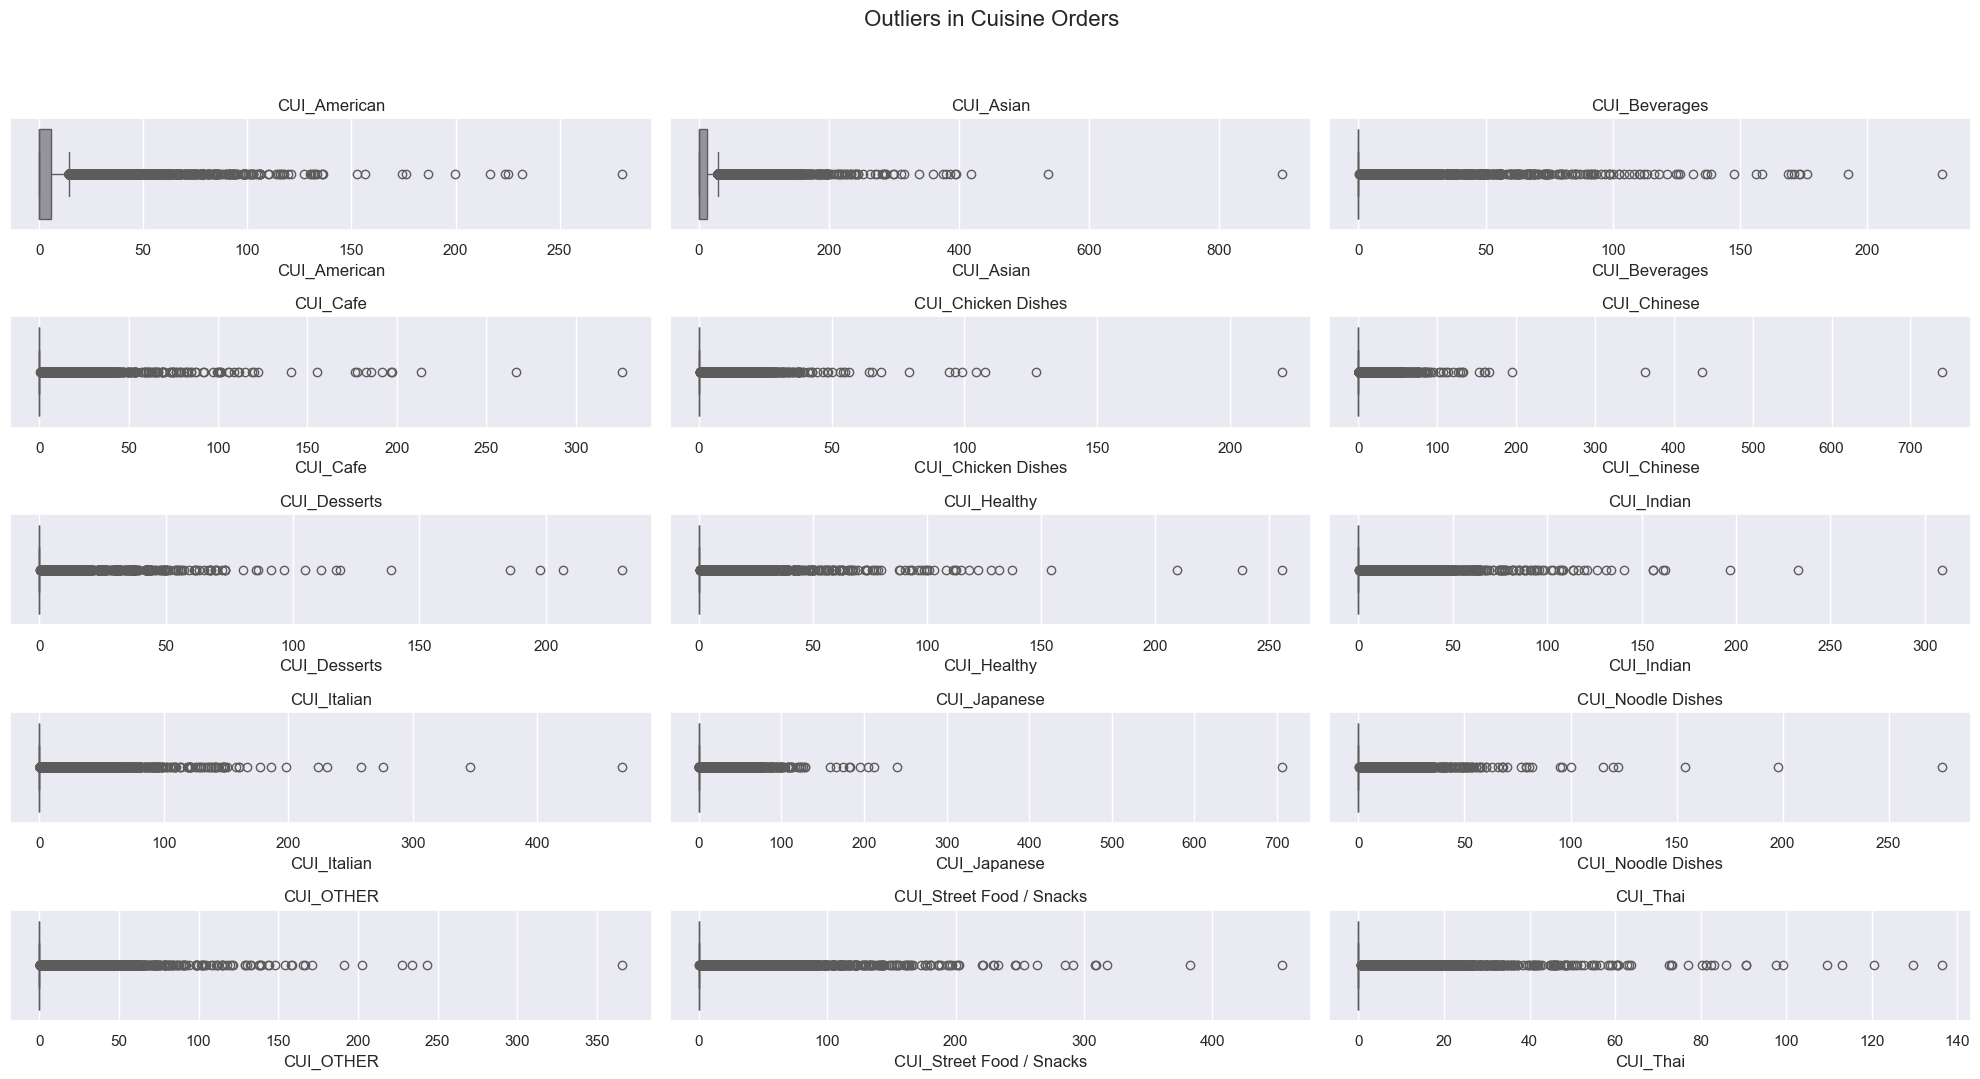

In [16]:
# Step 1: List of features for which you want to plot boxplots
metric_features = [col for col in df.columns if 'CUI_' in col]

# Step 2: Filter valid columns to avoid errors
valid_features = [feat for feat in metric_features if feat in df.columns]

# Step 3: Set Seaborn style for better aesthetics
sns.set()

# Step 4: Number of rows and columns in the subplot grid
sp_rows = 5
sp_cols = ceil(len(valid_features) / sp_rows)  # Calculate the number of columns needed

# Step 5: Prepare figure and axes for subplots
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11)  # Size of the figure
                        )

# Step 6: Flatten axes array in case it is 2D for easier iteration
axes = axes.flatten()

# Step 7: Plot data: Iterate across axes and valid features
for ax, feat in zip(axes, valid_features):
    sns.boxplot(x=df[feat], ax=ax, color="#9391A0")  # Use grey color for the boxplots
    ax.set_title(feat)  # Set title for each subplot to indicate the feature being plotted

# Step 8: Remove any extra empty subplots if there are any
for ax in axes[len(valid_features):]:
    ax.remove()

# Step 9: Layout adjustments
title = "Outliers in Cuisine Orders"
plt.suptitle(title, fontsize=16)  # Main title for the entire figure
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for the main title
plt.show()


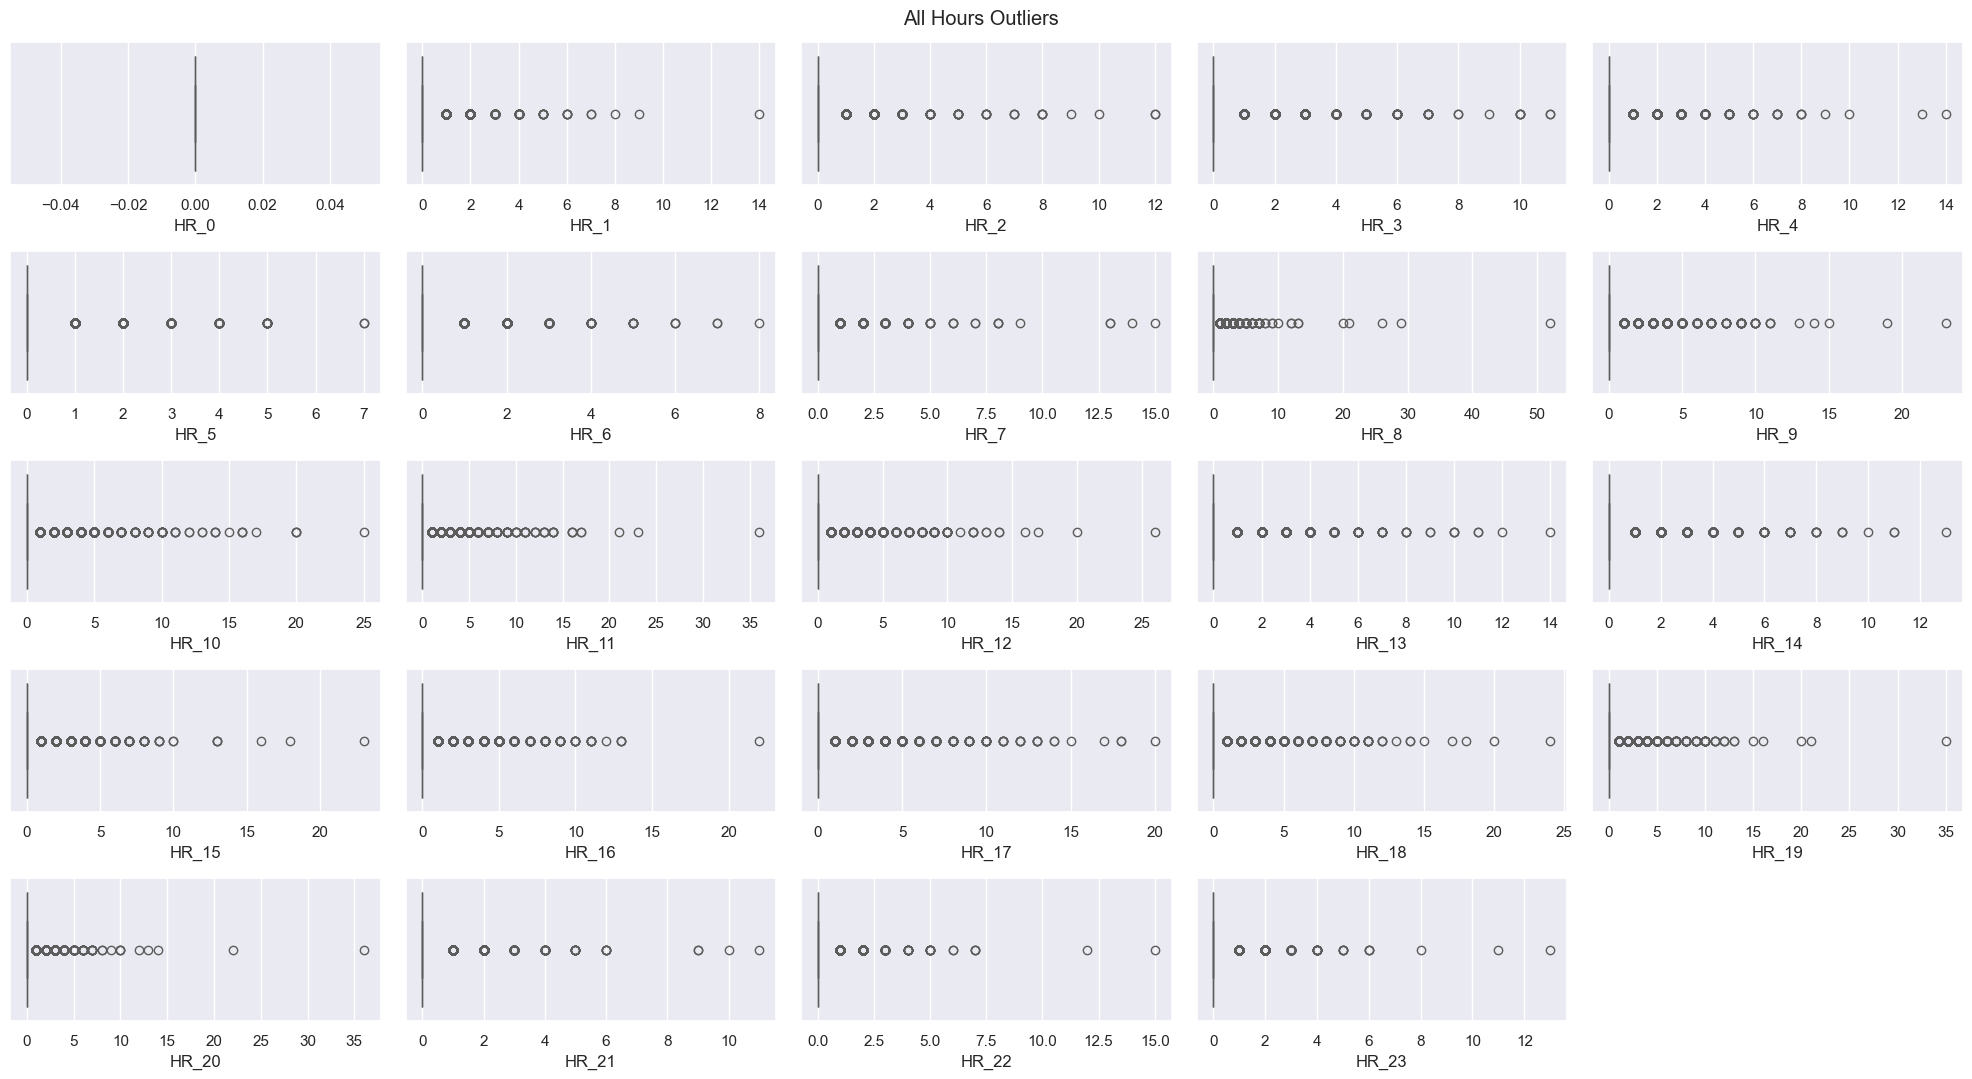

In [17]:
# List of features for which you want to plot boxplots
metric_features = [col for col in df.columns if 'HR_' in col]

# Filter valid columns to avoid errors
valid_features = [feat for feat in metric_features if feat in df.columns]

# Set Seaborn style
sns.set()

# Number of rows and columns in the subplot grid
sp_rows = 5
sp_cols = ceil(len(valid_features) / sp_rows)

# Prepare figure and axes
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11)
                        )

# Flatten axes array in case it is 2D
axes = axes.flatten()

# Plot data: Iterate across axes and valid features
for ax, feat in zip(axes, valid_features):
    sns.boxplot(x=df[feat], ax=ax, color= "#9391A0")

# Remove any extra empty subplots
for ax in axes[len(valid_features):]:
    ax.remove()

# Layout adjustments
title = "All Hours Outliers"
plt.suptitle(title)
plt.tight_layout()
plt.show()

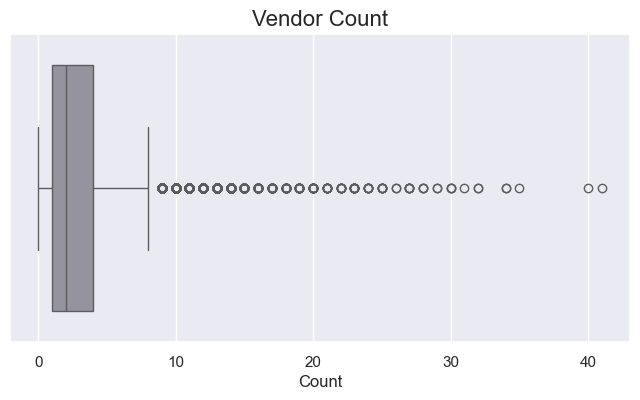

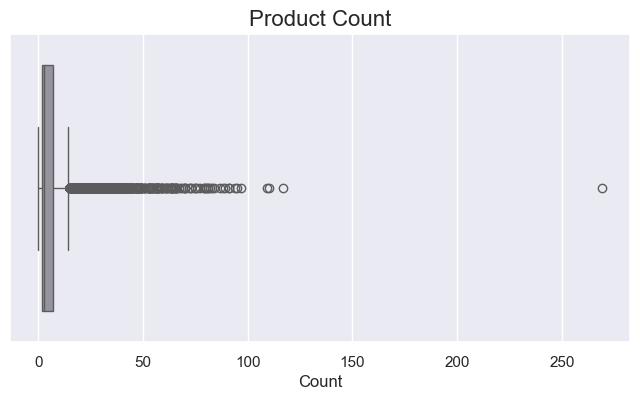

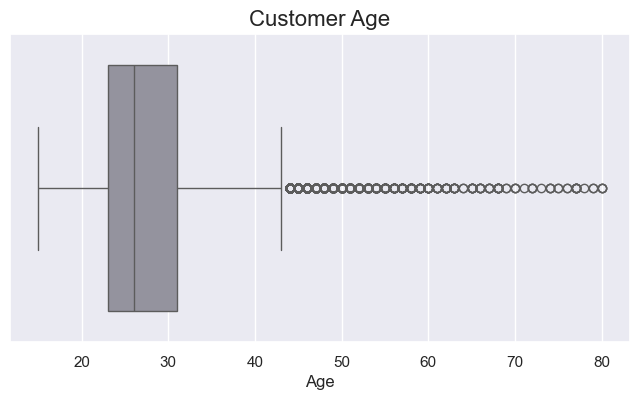

In [18]:
# Step 1: Plot Vendor Count
plt.figure(figsize=(8, 4))  # Set the figure size for the plot
sns.boxplot(x=df['vendor_count'], orient='h', color="#9391A0")  # Create a horizontal boxplot for vendor count
plt.title('Vendor Count', fontsize=16)  # Title for context
plt.xlabel('Count', fontsize=12)  # X-axis label
plt.show()  # Display the plot

# Step 2: Plot Product Count
plt.figure(figsize=(8, 4))  # Set the figure size for the plot
sns.boxplot(x=df['product_count'], orient='h', color="#9391A0")  # Create a horizontal boxplot for product count
plt.title('Product Count', fontsize=16)  # Title for context
plt.xlabel('Count', fontsize=12)  # X-axis label
plt.show()  # Display the plot

# Step 3: Plot Customer Age
plt.figure(figsize=(8, 4))  # Set the figure size for the plot
sns.boxplot(x=df['customer_age'], orient='h', color="#9391A0")  # Create a horizontal boxplot for customer age
plt.title('Customer Age', fontsize=16)  # Title for context
plt.xlabel('Age', fontsize=12)  # X-axis label
plt.show()  # Display the plot

# 6. Key statistics summary

## Remarks
- **Customer Age**: The mean of 'customer_age' is 27.5. 25% of the customers are 23 or younger, and 75% are 32 or younger. Thus, young people tend to use our food delivery services.
- **Vender Number**: The mean of 'vendor_count' is 3.1. 25% of the customers have ordered from one vendor, 50% have ordered from two vendors, and 75% have ordered from four vendors. Thus, most of the customers have ordered from less than four vendors in three months.
- **Product Number**: The mean of 'product_count' is 5.67. 25% of the customers have ordered two products, 50% have ordered three products, and 75% have ordered seven products in three months. There is a high standard deviation of 6.96, reflecting significant variability in order volume.
- **Chain Restaurant Number**: DISAGREE WITH METADATA. The values should be converted to boolean in the next process.
- **Date of First Order and Last Order**: It is unclear whether these features will be useful in our analysis. It is still undecided, but it should be converted to a different presentation method if we use them.
- **Payment Methods**: Most customers pay by card rather than by cash or digital.
- **Customer Region**: There are eight different regions. There should be three cities instead, so it seems like they are postal codes. Then we can categorize them into three groups (cities): city A (2360, 2440 and 2490), city B (4660 and 4140), and city C (8670, 8370 and 8550) in the next process.
- **Order Numbers per Regions**: The region with the highest number of orders was 8670, followed by 4660 and 2360, far ahead of the other regions. The region 8670 had the highest number of unique customers who placed orders, followed by 4660 and 2360.
# 7. Trends
- **Young Customers**: The majority of food delivery customers fall within the younger demographic range, predominantly between the ages of 18 and 32.
- **Payment by Card**: Most customers pay by card rather than by cash or digital.
- **Popular Cuisine**: American and Asian dishes emerge as the most popular choices.
- **Popular Cuisine per Regions**: Asian cuisine is the most popular in region 8670, while Italian cuisine leads in region 4660. This trend is consistent across other city regions, though with significant variation in total order volumes. In region 4140, however, the popularity of these cuisines is less pronounced compared to the two largest regions. City A shows greater diversity in cuisine preferences than the other two cities.
- **Busier Day of The Week**: Peak food ordering on Thursdays (DOW_4) and Saturdays (DOW_6).
- **Busier Hours**: High demand occurs from 10:00 AM to 12:00 PM and 4:00 PM to 6:00 PM.
- **Customer Frequency**: Most of the customers stay for two to three days, this short engagement period suggests that customers may use the service sporadically rather than consistently over extended periods.

In [19]:
df.describe() # Provides a summary of key statistics

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31161.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,30723.0,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.0000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.506499,3.102609,5.668245,2.818866,28.478604,63.675521,4.880438,9.960451,2.300633,0.801163,0.768096,1.431218,0.884359,0.950203,1.631153,3.233411,2.995379,0.711676,2.999913,3.913253,0.841697,0.555914,0.567486,0.591006,0.619449,0.677747,0.652973,0.704246,0.0,0.053845,0.063190,0.118759,0.101700,0.081943,0.069681,0.0768,0.131899,0.233912,0.329560,0.378167,0.314162,0.236453,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,7.160898,2.771587,6.957287,3.977529,24.109086,23.226123,11.654018,23.564351,8.479734,6.427132,3.657273,8.191755,5.259868,5.830590,7.443234,11.247990,10.180851,4.536457,9.768300,15.548507,4.433047,1.013601,1.044090,1.045907,1.069672,1.088122,1.069947,1.167446,0.0,0.317013,0.351498,0.500862,0.437493,0.358705,0.329461,0.3777,0.635582,0.724906,0.891161,0.959961,0.842484,0.637502,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.000000,

In [20]:
df.describe(include = "object")

,customer_id,customer_region,last_promo,payment_method
count,31888,31888,31888,31888
unique,31875,9,4,3
top,742ca068fc,8670,-,CARD
freq,2,9761,16748,20161


In [21]:
(df['payment_method'] == "DIGI").sum()

np.int64(6101)

In [22]:
(df['payment_method'] == "CASH").sum()

np.int64(5626)

In [23]:
df.describe(include = "all")

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31888,31888,31161.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888,31888,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,30723.0,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.0000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
unique,31875,9,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,742ca068fc,8670,NaN,NaN,NaN,NaN,NaN,NaN,-,CARD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,9761,NaN,NaN,NaN,NaN,NaN,NaN,16748,20161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,27.506499,3.102609,5.668245,2.818866,28.478604,63.675521,NaN,NaN,4.880438,9.960451,2.300633,0.801163,0.768096,1.431218,0.884359,0.950203,1.631153,3.233411,2.995379,0.711676,2.999913,3.913253,0.841697,0.555914,0.567486,0.591006,0.619449,0.677747,0.652973,0.704246,0.0,0.053845,0.063190,0.118759,0.101700,0.081943,0.069681,0.0768,0.131899,0.233912,0.329560,0.378167,0.314162,0.236453,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,NaN,NaN,7.160898,2.771587,6.957287,3.977529,24.109086,23.226123,NaN,NaN,11.654018,23.564351,8.479734,6.427132,3.657273,8.191755,5.259868,5.830590,7.443234,11.247990,10.180851,4.536457,9.768300,15.548507,4.433047,1.013601,1.044090,1.045907,1.069672,1.088122,1.069947,1.167446,0.0,0.317013,0.351498,0.500862,0.437493,0.358705,0.329461,0.3777,0.635582,0.724906,0.891161,0.959961,0.842484,0.637502,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,NaN,NaN,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

## Bar Chart of Total Orders by Customer Region
### Summary for Total Orders by Customer Region:
- This bar chart shows the total number of orders segmented by customer regions.
- The x-axis lists the different regions, while the y-axis indicates the total orders placed from each region.
- This visualization is useful for understanding regional preferences and sales distribution.

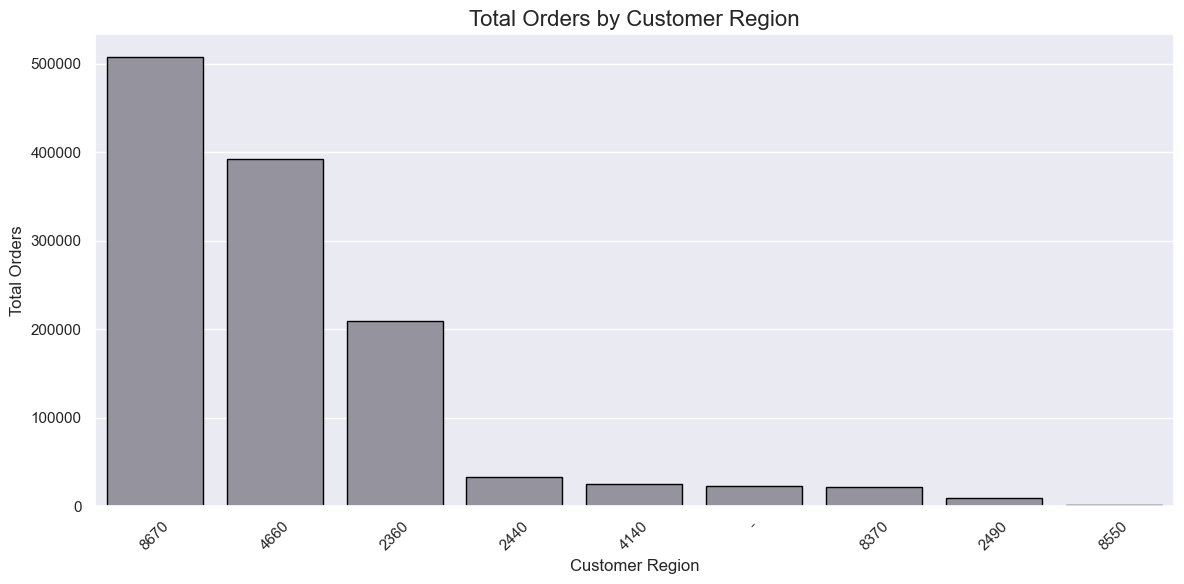

In [24]:
# List of all cuisine columns, including the combined CUI_OTHER
cuisine_columns = [col for col in df.columns if 'CUI_' in col]  # Replace with actual cuisine column names

# Calculate total orders by summing across all cuisine columns
df['total_orders'] = df[cuisine_columns].sum(axis=1)

# Group data by customer region and calculate total orders for each region
region_orders = df.groupby('customer_region')['total_orders'].sum().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))  # Set the figure size for visibility
sns.barplot(x=region_orders.index, y=region_orders.values, color='#9391A0', edgecolor='black')  # Create the bar plot
plt.title('Total Orders by Customer Region', fontsize=16)  # Title for context
plt.xlabel('Customer Region', fontsize=12)  # X-axis label
plt.ylabel('Total Orders', fontsize=12)  # Y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better presentation
plt.show()  # Display the plot

## Bar Chart of Unique Customer Count by Region
### Summary for Unique Customer Count by Region:
- This bar chart illustrates the number of unique customers segmented by customer regions.
- The x-axis shows the different regions, while the y-axis indicates the count of unique customers from each region.
- This visualization helps identify regions with higher customer engagement and potential market opportunities.

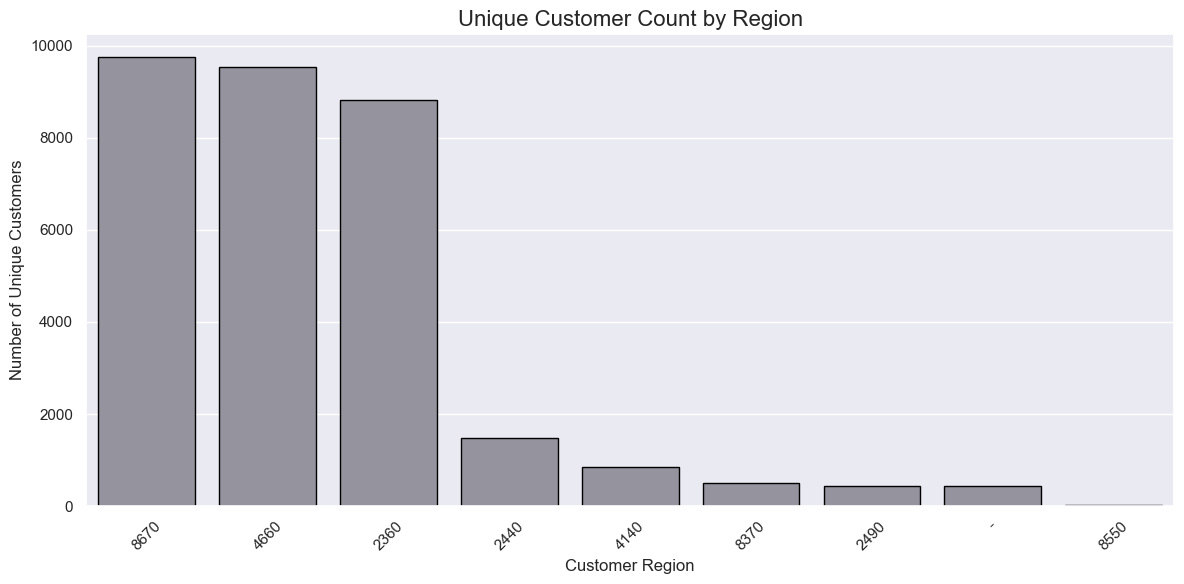

In [25]:
# Calculate unique customer count per region
region_customer_counts = df.groupby('customer_region')['customer_id'].nunique().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))  # Set the figure size for visibility
sns.barplot(x=region_customer_counts.index, y=region_customer_counts.values, color='#9391A0', edgecolor='black')  # Create the bar plot
plt.title('Unique Customer Count by Region', fontsize=16)  # Title for context
plt.xlabel('Customer Region', fontsize=12)  # X-axis label
plt.ylabel('Number of Unique Customers', fontsize=12)  # Y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better presentation
plt.show()  # Display the plot

## Bar Chart of Total Orders by Customer Region and Cuisine Type
### Summary for Total Orders by Region and Cuisine Type:
- This bar chart illustrates the distribution of total orders across different customer regions, segmented by cuisine type.
- The x-axis shows the various regions, while the y-axis indicates the total order count for each cuisine.
- This visualization aids in understanding customer preferences and cuisine popularity in different regions.

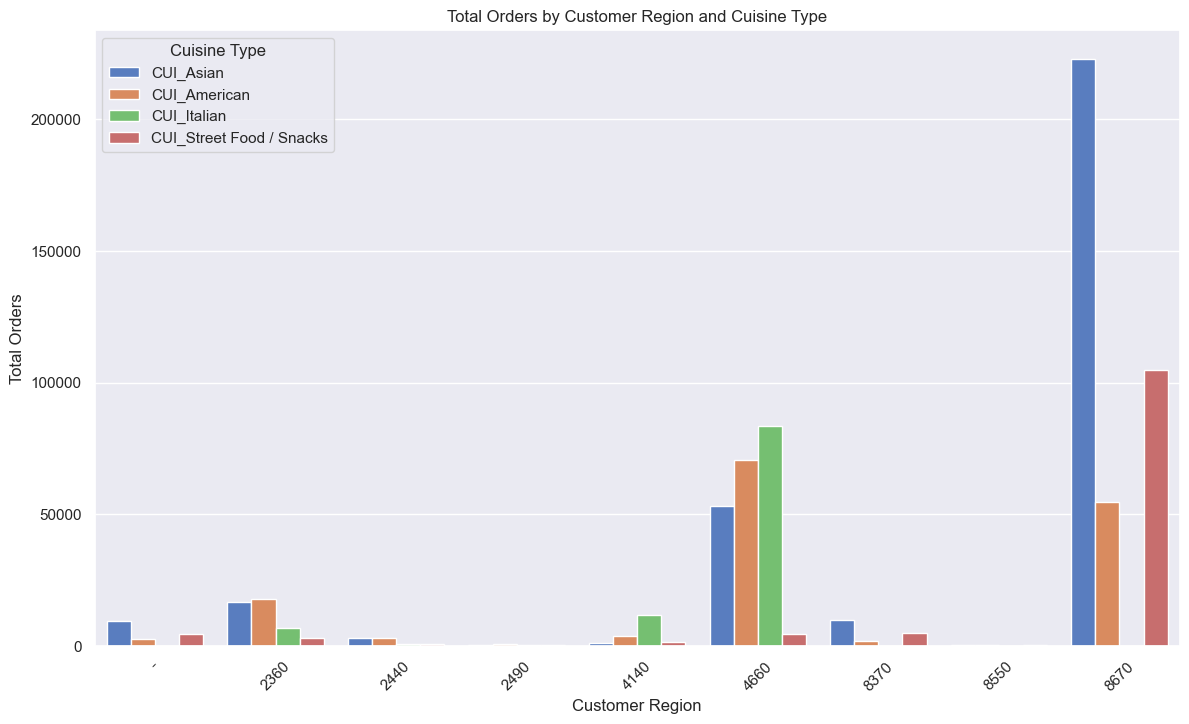

In [26]:
# Summing total orders by cuisine and region
cuisine_columns = ['CUI_Asian', 'CUI_American', 'CUI_Italian', 'CUI_Street Food / Snacks']
region_cuisine_orders = df.groupby('customer_region')[cuisine_columns].sum()

# Resetting the index for plotting
region_cuisine_orders = region_cuisine_orders.reset_index()

# Melt the DataFrame to get a long-form version suitable for seaborn
region_cuisine_orders_melted = region_cuisine_orders.melt(id_vars='customer_region', 
                                                          value_vars=cuisine_columns, 
                                                          var_name='Cuisine', 
                                                          value_name='Total Orders')

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=region_cuisine_orders_melted, x='customer_region', y='Total Orders', hue='Cuisine', palette="muted")
plt.title('Total Orders by Customer Region and Cuisine Type')
plt.xlabel('Customer Region')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.legend(title='Cuisine Type')
plt.show()

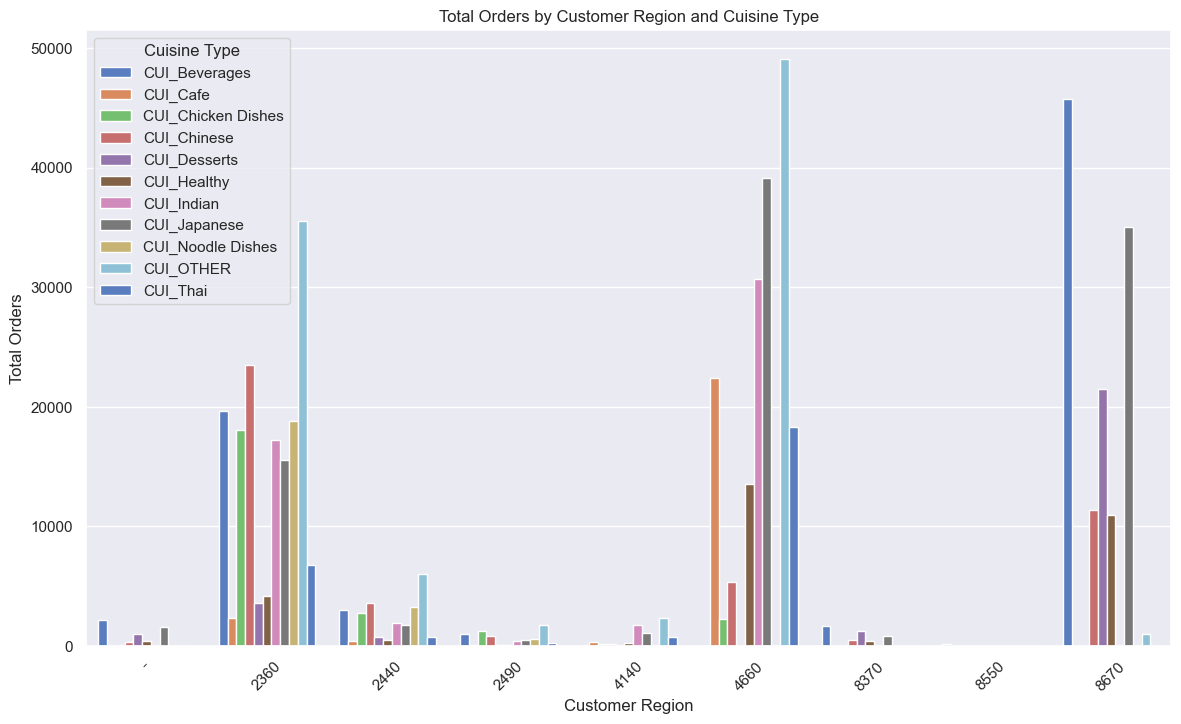

In [27]:
# Summing total orders by cuisine and region
cuisine_columns = ['CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Thai']
region_cuisine_orders = df.groupby('customer_region')[cuisine_columns].sum()

# Resetting the index for plotting
region_cuisine_orders = region_cuisine_orders.reset_index()

# Melt the DataFrame to get a long-form version suitable for seaborn
region_cuisine_orders_melted = region_cuisine_orders.melt(id_vars='customer_region', 
                                                          value_vars=cuisine_columns, 
                                                          var_name='Cuisine', 
                                                          value_name='Total Orders')

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=region_cuisine_orders_melted, x='customer_region', y='Total Orders', hue='Cuisine', palette="muted")
plt.title('Total Orders by Customer Region and Cuisine Type')
plt.xlabel('Customer Region')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.legend(title='Cuisine Type')
plt.show()

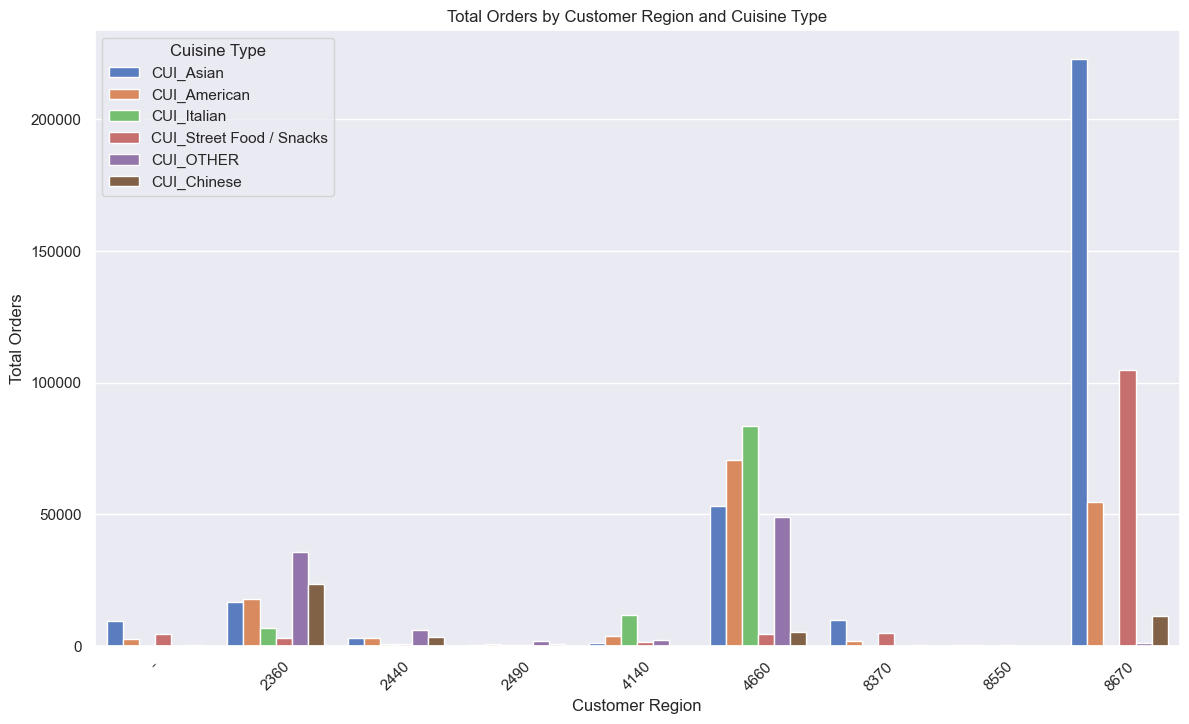

In [28]:
# Summing total orders by cuisine and region
cuisine_columns = ['CUI_Asian', 'CUI_American', 'CUI_Italian', 'CUI_Street Food / Snacks', 'CUI_OTHER', 'CUI_Chinese']
region_cuisine_orders = df.groupby('customer_region')[cuisine_columns].sum()

# Resetting the index for plotting
region_cuisine_orders = region_cuisine_orders.reset_index()

# Melt the DataFrame to get a long-form version suitable for seaborn
region_cuisine_orders_melted = region_cuisine_orders.melt(id_vars='customer_region', 
                                                          value_vars=cuisine_columns, 
                                                          var_name='Cuisine', 
                                                          value_name='Total Orders')

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=region_cuisine_orders_melted, x='customer_region', y='Total Orders', hue='Cuisine', palette="muted")
plt.title('Total Orders by Customer Region and Cuisine Type')
plt.xlabel('Customer Region')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.legend(title='Cuisine Type')
plt.show()

## Histogram of Customer Frequency

### Summary for Distribution of Client Duration:
- This histogram illustrates the frequency distribution of the duration (in days) that clients have been active.
- The x-axis represents the number of days, while the y-axis shows how many clients fall into each duration range.
- This visualization helps to identify typical client lifespans and patterns in client retention.

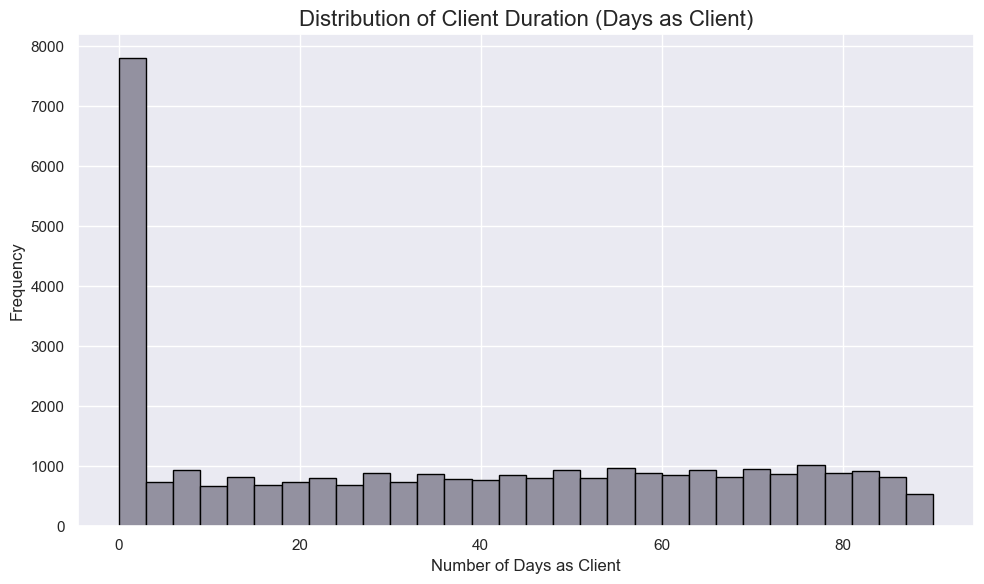

In [29]:
# Calculate the difference in days between the last and first order
df['days_as_client'] = df['last_order'] - df['first_order']

# Plotting the distribution of days as a client
plt.figure(figsize=(10, 6))  # Set the figure size for visibility
plt.hist(df['days_as_client'].dropna(), bins=30, color='#9391A0', edgecolor='black')  # Create histogram
plt.title("Distribution of Client Duration (Days as Client)", fontsize=16)  # Title for context
plt.xlabel("Number of Days as Client", fontsize=12)  # X-axis label
plt.ylabel("Frequency", fontsize=12)  # Y-axis label
plt.tight_layout()  # Adjust layout for better presentation
plt.show()  # Display the plot

# 8. New Feature Creation

## 1. Regional Demographic
    [city_A; city_B; city_C]
There are currently eight distinct regions identified in the customer_region feature, though these appear to correspond to postal codes rather than broader geographic areas. By consolidating these into three new categorical features representing cities — City A (2360, 2440, 2490), City B (4660, 4140), and City C (8670, 8370, 8550) — we gain valuable segmentation potential. 
    This new structure allows for a more refined analysis of customer preferences by city, particularly in terms of cuisine choices. Grouping regions in this way can enhance our understanding of geographic trends in customer behavior, enabling us to apply targeted marketing strategies that align more closely with regional tastes and preferences. This feature engineering step provides a clearer, more actionable view of customer segments, supporting data-driven decision-making for regional market approaches.

## 2. Cuisine Popularity Rate
    [low_popularity; medium_popularity; high_popularity]
In our feature engineering efforts, we categorize cuisine types into three popularity levels — Low, Medium, and High — based on a defined order volume threshold. This segmentation enables targeted marketing strategies tailored to each cuisine's popularity. 
    For example, high-popularity cuisines can be promoted through broad campaigns to capture the attention of a larger audience, while low-popularity cuisines may benefit from niche marketing efforts aimed at specific customer segments. By aligning our marketing initiatives with the popularity of each cuisine type, we can enhance customer engagement, improve conversion rates, and ultimately drive business growth.

## 3. Age Segmentation
    [15-23; 24-26; 27-31; 32-80]
Age segmentation based on the provided key statistics summary reveals valuable insights into our customer demographics. With a minimum age of 15 years and a maximum of 80 years, our dataset captures a wide range of customers, highlighting diverse preferences and behaviors across different age groups.
    The quartile statistics further illustrate this diversity: 25% of our customers are 23 years or younger, indicating a substantial segment of younger consumers who may have distinct tastes and purchasing patterns. The median age of 26 years suggests that half of our customer base is relatively young, while the upper quartile at 31 years indicates a growing segment of slightly older customers. This age distribution underscores the importance of tailoring marketing strategies to resonate with varying age groups. 
    For example, younger consumers may be more influenced by trends and social media, while older customers might prioritize quality and brand reputation. By segmenting our marketing efforts according to these age demographics, we can create targeted campaigns that effectively address the unique preferences and needs of each age group, ultimately enhancing customer engagement and driving sales growth.

## 4. Peak Hours
    [morning_peak; afternoon_peak] 
By analyzing daily activity patterns, we observe that the majority of orders occur between 9 AM and 7 PM, identifying these as peak hours. This timeframe can be further divided into two segments: the morning peak (9 AM to 1 PM) and the afternoon peak (2 PM to 7 PM). Understanding customer preferences and behaviors during these distinct periods allows us to tailor our logistical and marketing strategies to better meet the demands of different cities throughout the day. This proactive approach enables us to optimize resource allocation, enhance customer satisfaction, and adapt our offerings to align with customer tendencies during peak ordering times.

## 5. Average Revenue per Order
    Total Revenue (Cuisine) / Total Orders (Cuisine)
Understanding how much revenue is generated per order can shed light on customer preferences and spending habits, allowing for targeted promotions and upselling opportunities. Also, it helps assess the profitability of each cuisine. A higher average revenue per order indicates that customers are willing to spend more on certain cuisines.

## 6. Customers Ordering Level
    [frequent_customers; moderate_customers, infrequent_customers]
Setting thresholds for order frequency enables effective segmentation of customer behavior into Low, Medium, and High ordering levels. This approach identifies frequent customers, allowing us to implement targeted marketing strategies to drive retention and loyalty among high-value segments.

# 9. Data Visualization

## Histograms of Customer Age and Vendor Count

### Summary:
- Purpose: The histograms visualize the distribution of customer ages and the count of vendors, providing insight into the demographics of customers and vendor usage patterns.
- Choice of Chart: A histogram is suitable for displaying the frequency distribution of numeric data, allowing us to see the range, spread, and any potential peaks in the data for both customer_age and vendor_count.
- Findings: Key observations will depend on the data shape; for example, the age distribution might reveal customer age trends, and vendor count could indicate the typical range or average for vendor interaction per customer.

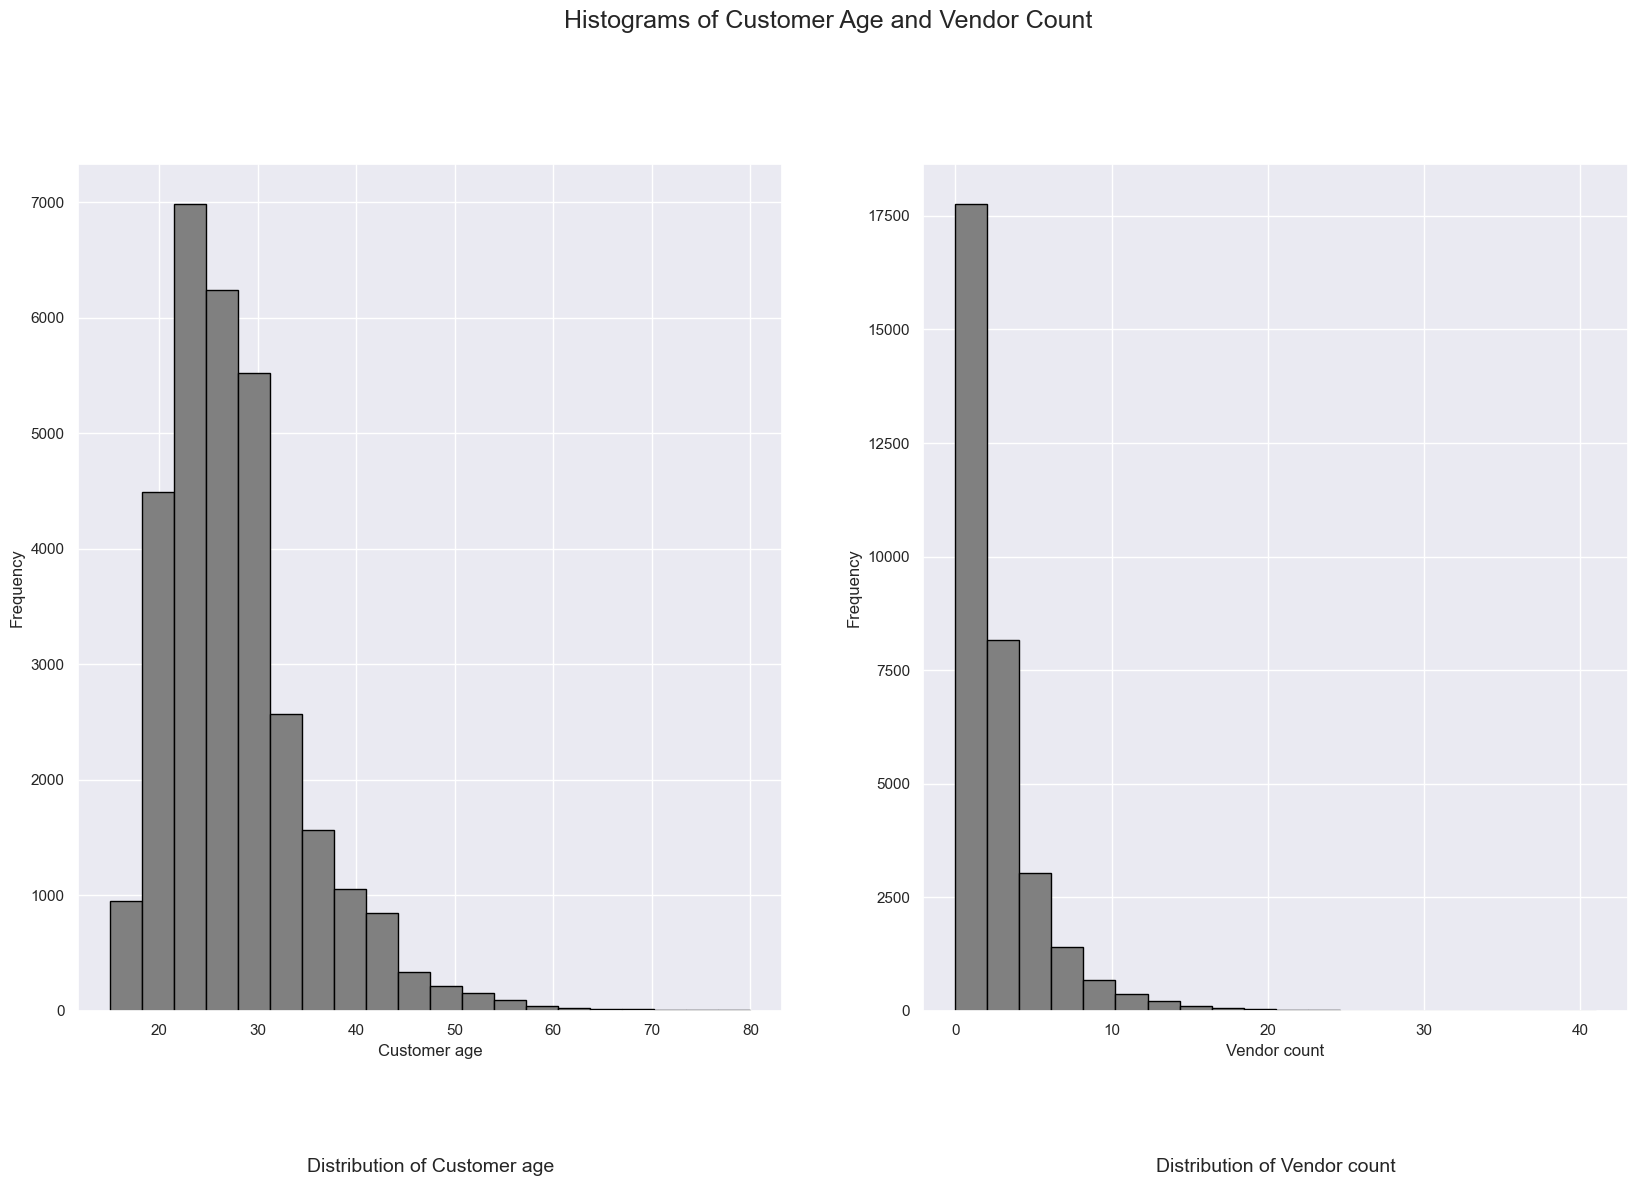

In [30]:
# Settings for subplots: number of rows and columns for the two features
sp_rows = 1
sp_cols = 2

# Prepare figure and create individual axes for each histogram
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11))

# Plot data for 'customer_age' and 'vendor_count'
# Iterate over each axis and feature to plot histograms
for ax, feature in zip(axes.flatten(), ['customer_age', 'vendor_count']):
    # Plot histogram in shades of grey for each feature
    ax.hist(df[feature].dropna(), bins=20, color='grey', edgecolor='black')
    ax.set_title(f'Distribution of {feature.capitalize().replace("_", " ")}', fontsize=14, y=-0.2)
    ax.set_xlabel(feature.capitalize().replace("_", " "))
    ax.set_ylabel("Frequency")

# Main title for the figure
plt.suptitle("Histograms of Customer Age and Vendor Count", fontsize=18, y=1.02)

# Ensure the directory exists for saving the figure
save_dir = os.path.join('..', 'figures', 'eda')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the figure as a high-quality PNG
plt.savefig(os.path.join(save_dir, 'customer_age_vendor_count_histograms.png'), dpi=200, bbox_inches='tight')

# Display the plot
plt.show()

## Histograms of First and Last Order Dates

### Summary:
- Purpose: The histograms of first_order and last_order illustrate the distribution of customer order initiation and most recent orders, providing insights into how customer activity may vary over time.
- Choice of Chart: A histogram helps to visualize the frequency and spread of these dates, which is essential for observing order patterns, such as seasonality or customer retention.
- Findings: The peaks indicate popular order periods or gaps suggesting low activity. Observing distributions of both features side-by-side allows comparison and can highlight any shifts in ordering trends over time.

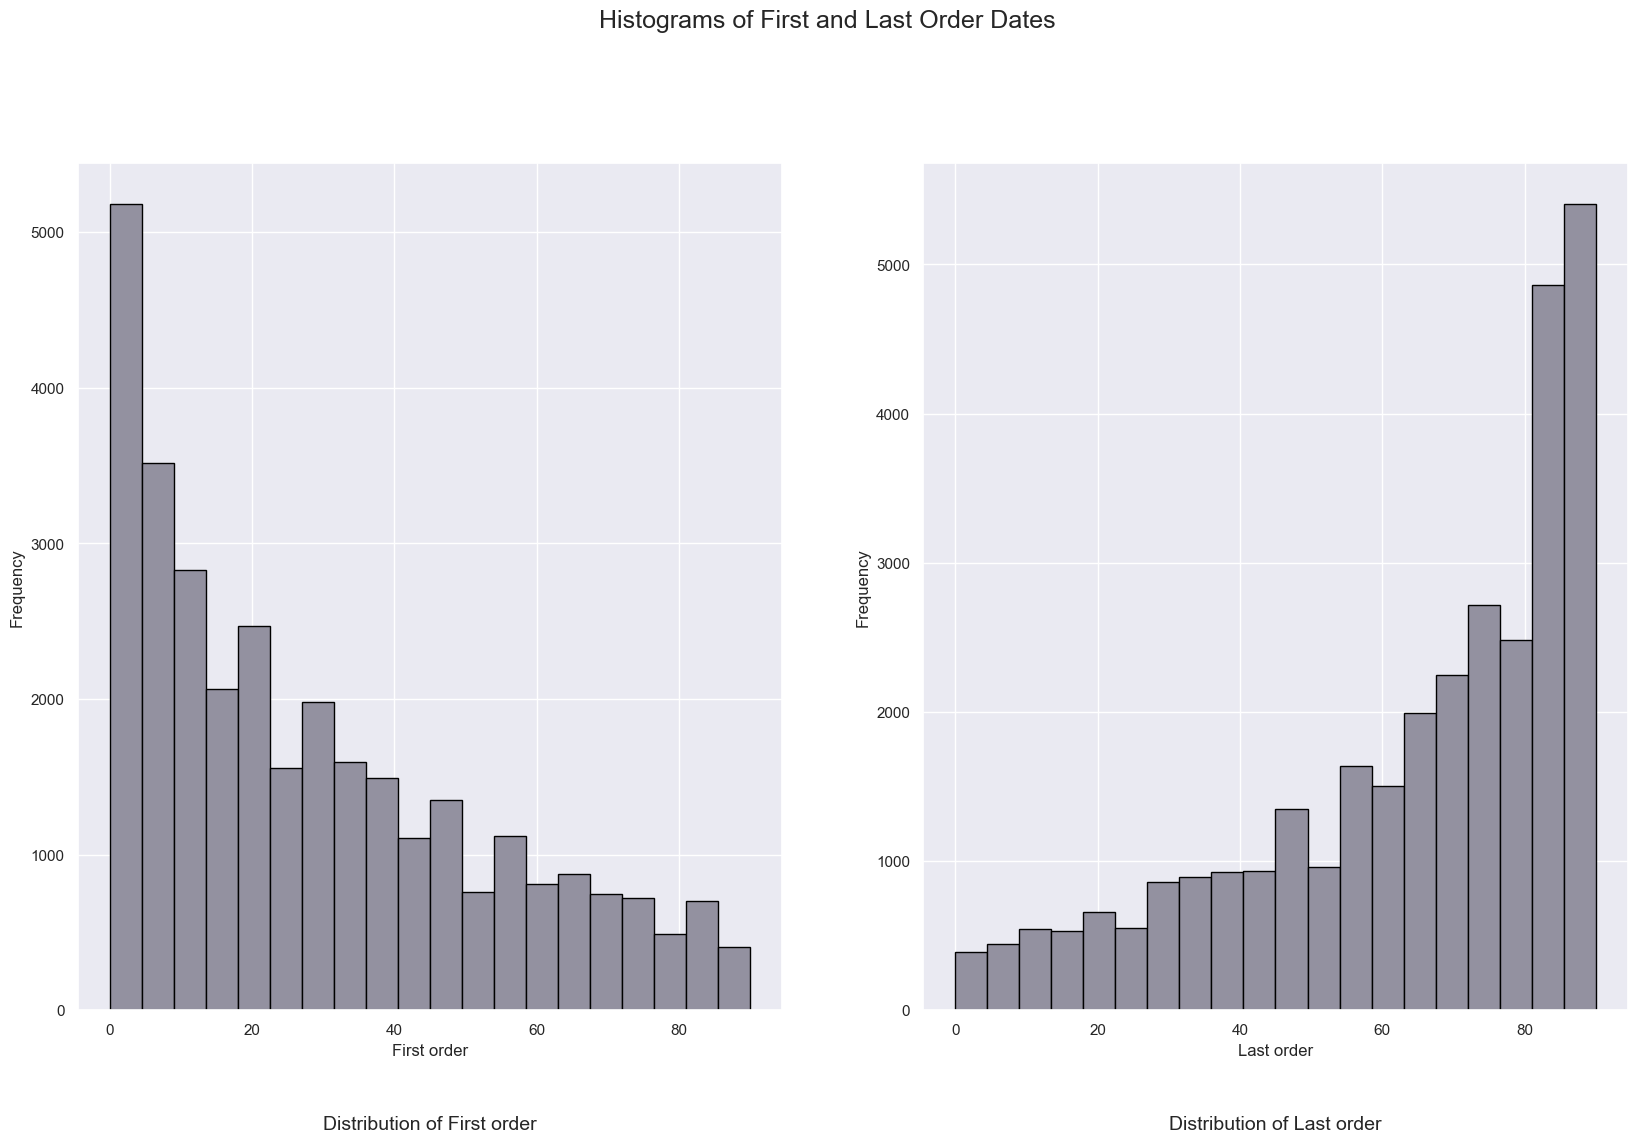

In [31]:
# Settings for subplots: Define rows and columns (if planning to add more histograms, this setting can be adjusted)
fig, axes = plt.subplots(1, 2, figsize=(20, 11))  # 1 row, 2 columns for two variables

# Plot histograms for 'first_order' and 'last_order'
for ax, feature in zip(axes.flatten(), ['first_order', 'last_order']):
    # Plot histogram with a grey color for both features
    ax.hist(df[feature].dropna(), bins=20, color='#9391A0', edgecolor='black')
    ax.set_title(f'Distribution of {feature.capitalize().replace("_", " ")}', fontsize=14, y=-0.15)
    ax.set_xlabel(feature.capitalize().replace("_", " "))
    ax.set_ylabel("Frequency")

# Main title for the figure, reflecting the context of the chart
plt.suptitle("Histograms of First and Last Order Dates", fontsize=18, y=1.02)

# Ensure the directory exists for saving the figure
save_dir = os.path.join('..', 'figures', 'eda')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the figure as a high-quality PNG file
plt.savefig(os.path.join(save_dir, 'first_last_order_histograms.png'), dpi=200, bbox_inches='tight')

# Display the plot
plt.show()

## Bar Chart of Total Orders Per Hour

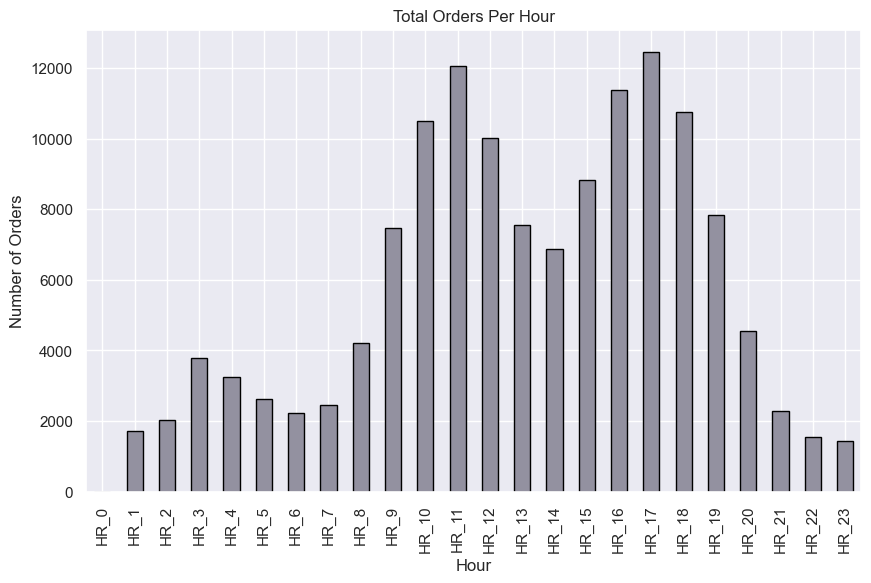

In [32]:
# Step 1: Selecting columns related to each hour (HR_0 to HR_23)
hour_columns = [f'HR_{i}' for i in range(24)]

# Step 2: Calculating total orders for each hour by summing across all rows for each hour column
total_orders_per_hour = df[hour_columns].sum()

# Step 3: Creating a bar plot to visualize total orders per hour in shades of grey
plt.figure(figsize=(10, 6))
total_orders_per_hour.plot(kind='bar', color="#9391A0", edgecolor='black')
plt.title('Total Orders Per Hour')  # Title describing the context of the chart
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()

## Bar Chart of Peak Hour Activity for Food Orders (HR_9 to HR_19)

### Summary:
- Purpose: This chart highlights food ordering activity during typical peak hours (HR_9 to HR_19), which can help in resource planning during these busy times.
- Choice of Chart: A bar chart is chosen for clear visualization of each hour’s activity, allowing easy identification of high-ordering periods within the specified range.
- Findings: Observing the chart may reveal distinct peaks within the specified hours, potentially around lunch and dinner times, which could indicate increased demand during these periods.

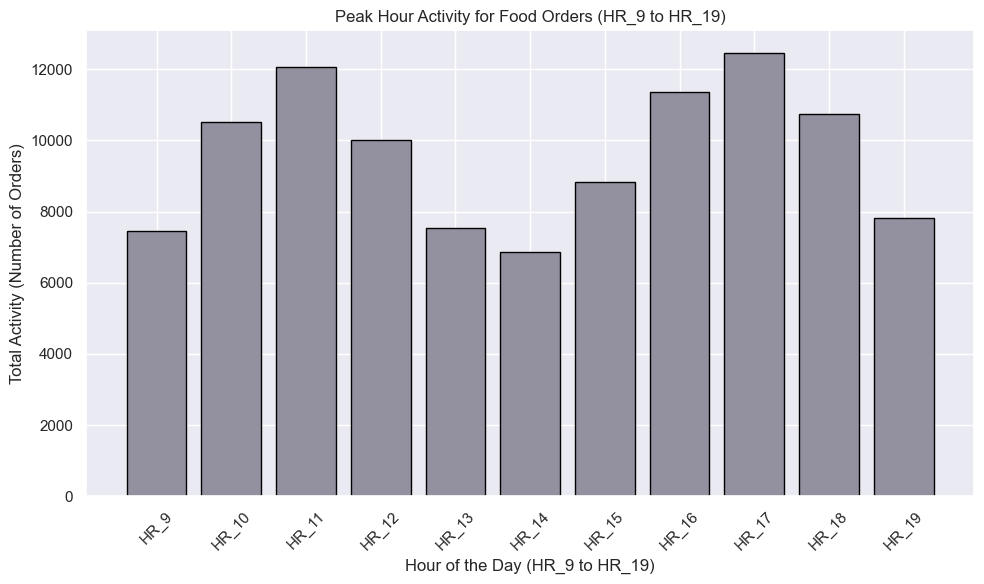

In [33]:
# Step 1: Select hour columns for the peak activity range (HR_9 to HR_19)
filtered_hr_columns = [f'HR_{i}' for i in range(9, 20)]

# Step 2: Calculate total orders during peak hours by summing across all rows for each hour column in the specified range
filtered_hour_activity = df[filtered_hr_columns].sum()

# Step 3: Plotting peak hour activity in a bar chart
plt.figure(figsize=(10, 6))
plt.bar(filtered_hour_activity.index, filtered_hour_activity.values, color="#9391A0", edgecolor='black')
plt.title('Peak Hour Activity for Food Orders (HR_9 to HR_19)')  # Title for context
plt.xlabel('Hour of the Day (HR_9 to HR_19)')
plt.ylabel('Total Activity (Number of Orders)')
plt.xticks(rotation=45)  # Rotate x-tick labels for readability
plt.tight_layout()  # Adjust layout for clarity
plt.show()

## Bar Chart of Total Orders Per Day of the Week

### Summary:
- Purpose: This chart visualizes the distribution of orders across the days of the week, providing insights into which days see higher customer activity.
- Choice of Chart: A bar chart effectively represents the total orders for each day of the week, making it easy to observe daily trends and identify peak ordering days.
- Findings: Analysis may reveal certain days with higher ordering volumes (e.g., weekends), which can help in planning staffing and inventory to accommodate demand fluctuations.

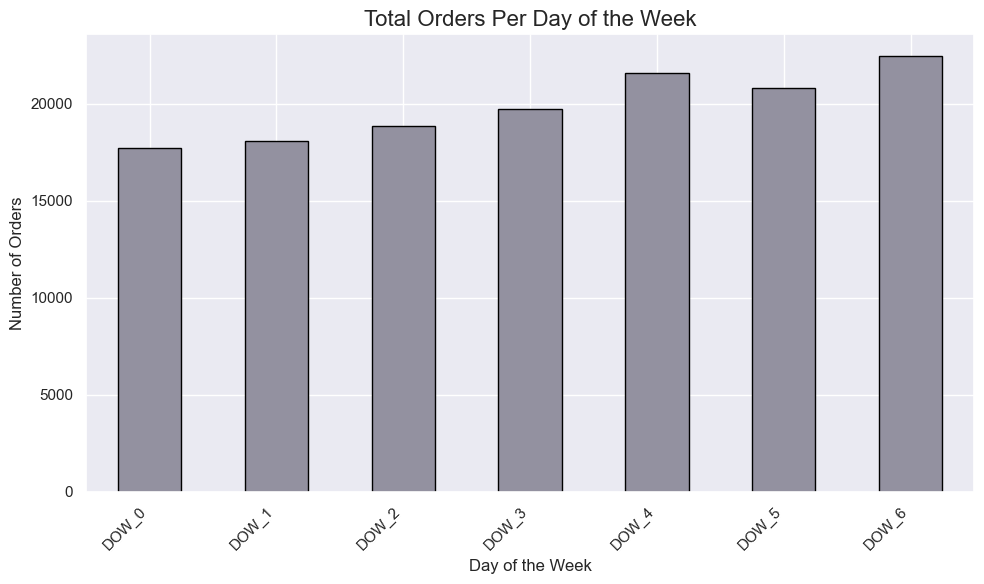

In [34]:
# Step 1: Selecting columns for days of the week (DOW_0 to DOW_6)
dow_columns = [f'DOW_{i}' for i in range(7)]

# Step 2: Calculating total orders for each day of the week by summing across all rows for each day column
total_orders_per_dow = df[dow_columns].sum()

# Step 3: Creating a bar chart to visualize total orders per day of the week in grey scale
plt.figure(figsize=(10, 6))
total_orders_per_dow.plot(kind='bar', color="#9391A0", edgecolor='black')
plt.title('Total Orders Per Day of the Week', fontsize=16)  # Title for context
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-tick labels for readability
plt.tight_layout()  # Adjust layout for clarity
plt.show()

## Bar chart of Total Orders Per Cuisine

### Summary:
- This chart visualizes the total number of orders by cuisine type.
- We chose a bar chart style because it effectively compares discrete categories (cuisines) visually.
- From the chart, we can observe which cuisines have the highest and lowest total orders, aiding in understanding customer preferences.

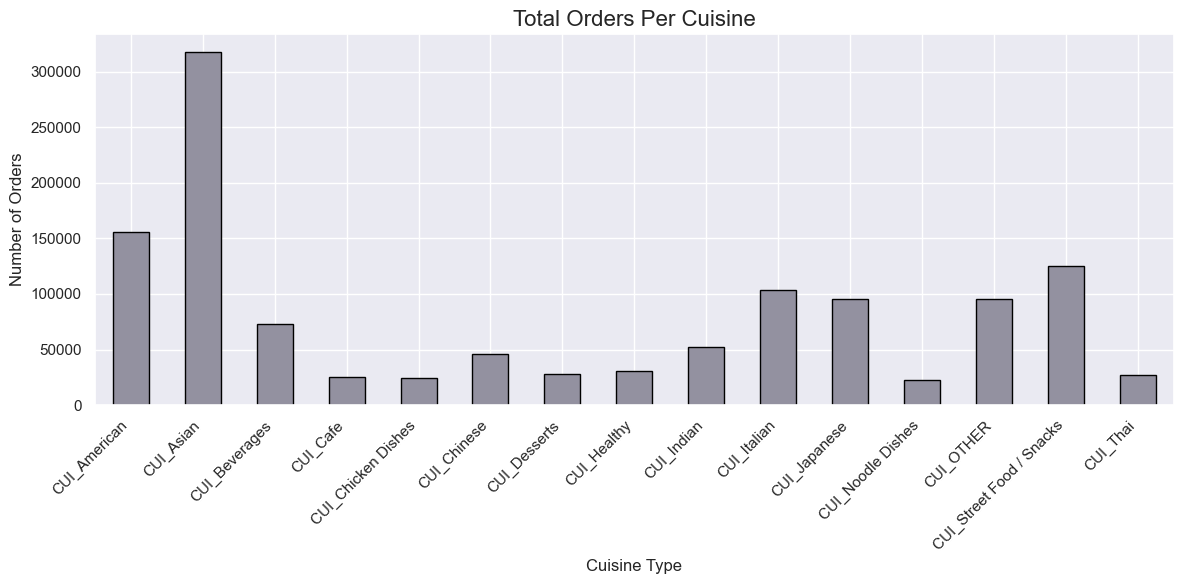

In [35]:
# Step 1: Selecting columns related to cuisines (CUI_American, CUI_Asian, etc.)
cuisine_columns = [col for col in df.columns if 'CUI_' in col]

# Step 2: Summing total number of orders per cuisine
df['total_orders_per_cuisine'] = df[cuisine_columns].sum(axis=1)

# Step 3: Creating a bar chart to visualize total orders per cuisine in grey scale
plt.figure(figsize=(12, 6))
df[cuisine_columns].sum().plot(kind='bar', color="#9391A0", edgecolor='black')
plt.title('Total Orders Per Cuisine', fontsize=16)  # Title for context
plt.xlabel('Cuisine Type', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-tick labels for readability
plt.tight_layout()  # Adjust layout for clarity
plt.show()

## Bar Chart of Cuisine Popularity Based on Total Orders

### Summary:
- This bar chart visualizes the popularity of various cuisines based on total orders.
- We chose a bar chart because it allows for easy comparison of total orders across different cuisines.
- The colors indicate popularity levels: light grey for low, medium grey for medium, and dark grey for high popularity.
- This visualization helps identify which cuisines are performing well and which may need more marketing efforts or menu adjustments.

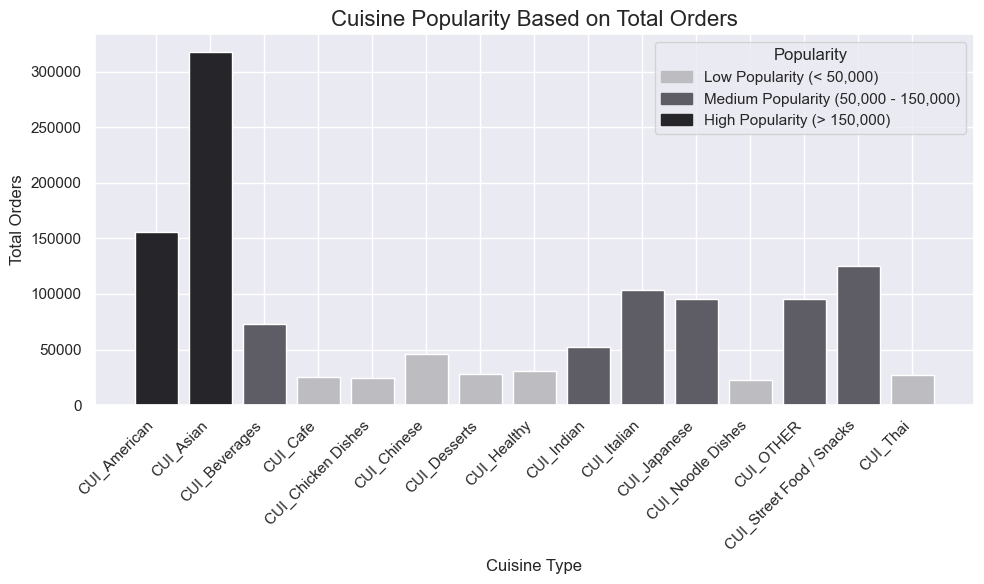

In [36]:
# Step 1: Define popularity ranking thresholds
low_threshold = 50000
high_threshold = 150000

# Step 2: Calculate total orders for each cuisine
cuisine_columns = [col for col in df.columns if 'CUI_' in col]
cuisine_totals = df[cuisine_columns].sum()

# Step 3: Assign colors based on popularity
colors = []
for total in cuisine_totals:
    if total < low_threshold:
        colors.append('#BDBDC1')  # Light grey for low popularity
    elif low_threshold <= total < high_threshold:
        colors.append('#5E5D66')  # Medium grey for medium popularity
    else:
        colors.append('#26262A')  # Dark grey for high popularity

# Step 4: Plot the bar chart with assigned colors
plt.figure(figsize=(10, 6))
plt.bar(cuisine_totals.index, cuisine_totals.values, color=colors)

# Step 5: Add labels and title
plt.title('Cuisine Popularity Based on Total Orders', fontsize=16)  # Title for context
plt.xlabel('Cuisine Type', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-tick labels for readability
plt.tight_layout()  # Adjust layout for clarity

# Step 6: Create a legend to explain color coding
low_patch = mpatches.Patch(color='#BDBDC1', label='Low Popularity (< 50,000)')
medium_patch = mpatches.Patch(color='#5E5D66', label='Medium Popularity (50,000 - 150,000)')
high_patch = mpatches.Patch(color='#26262A', label='High Popularity (> 150,000)')

plt.legend(handles=[low_patch, medium_patch, high_patch], title='Popularity')

# Show the plot
plt.show()


## Bar Chart of Top 3 Cuisines During Peak Hours

### Summary:
- This stacked bar chart illustrates the total orders of the top 3 cuisines during peak hours (9 AM to 7 PM).
- A stacked bar chart was chosen to show how each cuisine contributes to total orders over the specified hours.
- The use of shades of grey helps differentiate the cuisines while maintaining a consistent visual theme.
- From this visualization, we can analyze which cuisines dominate during peak hours and how their order volumes compare.

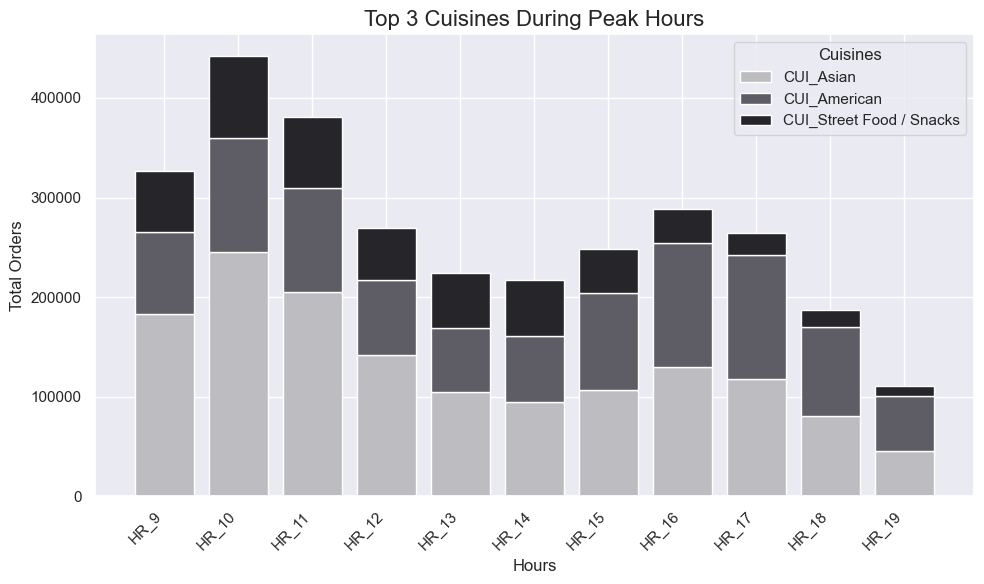

In [37]:
# Step 1: Define popularity thresholds
low_threshold = 50000
high_threshold = 150000

# Step 2: Define the adjusted peak hours
hour_columns = [f'HR_{i}' for i in range(24)]  # From HR_0 to HR_23
filtered_hr_columns = hour_columns[9:20]  # Adjusted to select hours from 9 to 19

# Step 3: Sort cuisines by total orders and select the top 3 most popular cuisines
top_cuisines = cuisine_totals.sort_values(ascending=False).head(3).index

# Step 4: Filter the dataset to include only the top 3 cuisines
filtered_cuisine_columns = top_cuisines

# Step 5: Initialize a DataFrame to store total cuisine orders per hour (for top 3 cuisines)
top_cuisine_hour_data = pd.DataFrame(index=filtered_hr_columns, columns=filtered_cuisine_columns)

# Step 6: Calculate the total orders for each of the top 3 cuisines in each hour (HR_9 to HR_19)
for hour in filtered_hr_columns:
    for cuisine in filtered_cuisine_columns:
        top_cuisine_hour_data.loc[hour, cuisine] = (df[hour] * df[cuisine]).sum()

# Step 7: Convert the values to numeric
top_cuisine_hour_data = top_cuisine_hour_data.apply(pd.to_numeric)

# Step 8: Define colors for the top 3 cuisines (shades of grey)
colors = ['#BDBDC1', '#5E5D66', '#26262A']  # Light grey, medium grey, dark grey

# Step 9: Plot a stacked bar chart for the top 3 cuisines
plt.figure(figsize=(10, 6))

# Step 10: Create the stacked bars for each cuisine
bottom_values = np.zeros(len(filtered_hr_columns))  # Keeps track of the bottom of the stack
for i, cuisine in enumerate(filtered_cuisine_columns):
    plt.bar(filtered_hr_columns, top_cuisine_hour_data[cuisine], bottom=bottom_values, label=cuisine, color=colors[i])
    bottom_values += top_cuisine_hour_data[cuisine]  # Update the bottom to stack the next bar

# Step 11: Add labels and title
plt.title('Top 3 Cuisines During Peak Hours', fontsize=16)  # Title for context
plt.xlabel('Hours', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.legend(title='Cuisines', bbox_to_anchor=(1, 1))  # Legend for clarity
plt.xticks(rotation=45, ha='right')  # Rotate x-tick labels for readability
plt.tight_layout()  # Adjust layout for clarity
plt.show()

## Bar charts of Low and Medium Popular Cuisines Orders during All Hours

### Summary:
- This stacked bar chart displays the total orders of low and medium popular cuisines throughout all hours of the day.
- A stacked bar chart was chosen to effectively show how each cuisine contributes to total orders across the hours.
- The use of grey scale ensures clarity while maintaining a professional appearance.
- This visualization helps identify trends in customer preferences for less popular cuisines across different times of the day.

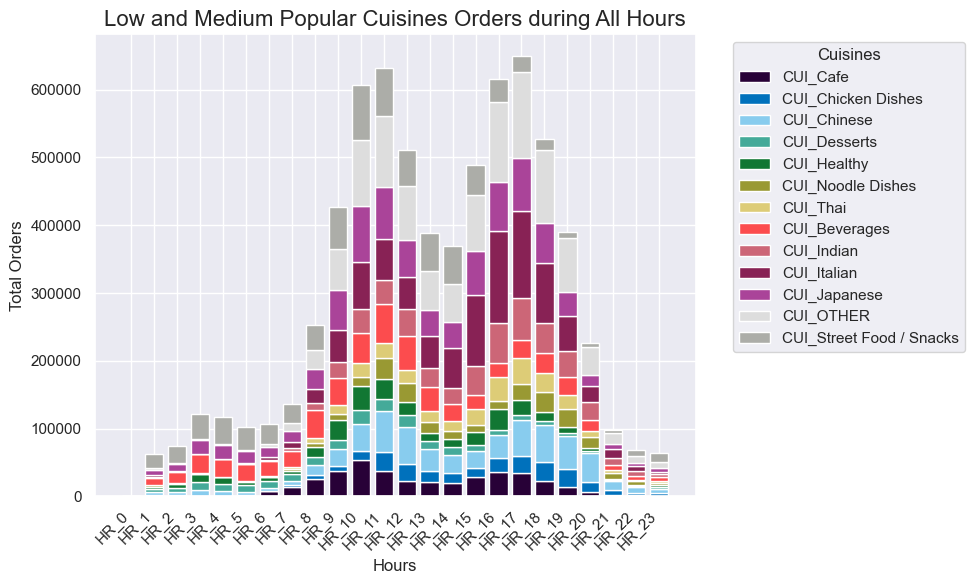

In [38]:
# Define the adjusted peak hours
hour_columns = [f'HR_{i}' for i in range(24)]

# Define popularity thresholds
low_threshold = 50000
medium_threshold = 150000

# Filter cuisines based on their order counts
low_popular_cuisines = cuisine_totals[cuisine_totals < low_threshold].index
medium_popular_cuisines = cuisine_totals[(cuisine_totals >= low_threshold) & (cuisine_totals < medium_threshold)].index

# Combine low and medium popular cuisines
filtered_cuisine_columns = low_popular_cuisines.append(medium_popular_cuisines)

# Initialize a DataFrame to store the total cuisine orders per hour (for low and medium cuisines)
cuisine_hour_data = pd.DataFrame(index=hour_columns, columns=filtered_cuisine_columns)

# Calculate the total orders for each cuisine in each hour (HR_9 to HR_19)
for hour in hour_columns:
    for cuisine in filtered_cuisine_columns:
        cuisine_hour_data.loc[hour, cuisine] = (df[hour] * df[cuisine]).sum()

# Convert the values to numeric
cuisine_hour_data = cuisine_hour_data.apply(pd.to_numeric)

# Define a distinct color palette for the cuisines
colors = ['#280137', '#0071bc', '#88CCEE', '#44AA99', '#117733', '#999933', '#DDCC77', '#FC4C4E',
          '#CC6677', '#882255', '#AA4499', '#DDDDDD', '#ACADA8']  # Add more colors as needed

# If you have more cuisines than colors, you may need to repeat or extend the colors list
if len(filtered_cuisine_columns) > len(colors):
    colors = colors * (len(filtered_cuisine_columns) // len(colors) + 1)

# Plot a stacked bar chart for the low and medium popular cuisines
plt.figure(figsize=(10, 6))

# Create the stacked bars for each cuisine
bottom_values = np.zeros(len(hour_columns))  # Keeps track of the bottom of the stack
for i, cuisine in enumerate(filtered_cuisine_columns):
    plt.bar(hour_columns, cuisine_hour_data[cuisine], bottom=bottom_values, label=cuisine, color=colors[i])
    bottom_values += cuisine_hour_data[cuisine]  # Update the bottom to stack the next bar

plt.title('Low and Medium Popular Cuisines Orders during All Hours', fontsize = 16)
plt.xlabel('Hours', fontsize = 12)
plt.ylabel('Total Orders', fontsize = 12)
plt.legend(title='Cuisines', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Bar Chart of Average Purchases per Order by Cuisine

### Summary:
- This bar chart illustrates the average purchases made per order for each cuisine type.
- The average purchases are calculated by multiplying the number of orders by the total revenue generated.
- for each cuisine, which allows for understanding which cuisines are generating higher revenue per order.
- The grey color maintains a professional appearance while focusing on the data presented.

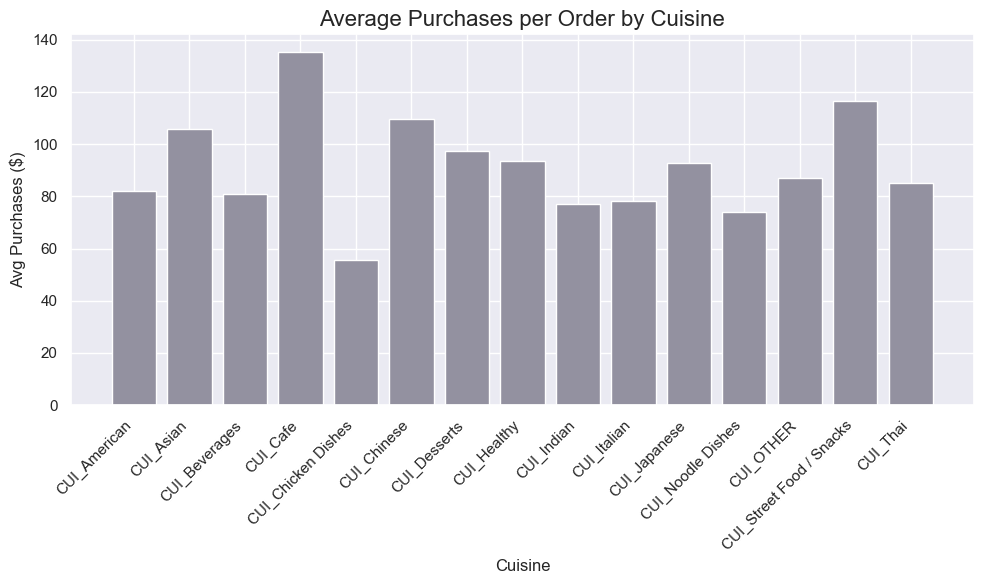

In [39]:
# Step 1: Check if 'total_revenue' exists; if not, create it by summing across cuisine columns
if 'total_revenue' not in df.columns:
    df['total_revenue'] = df[cuisine_columns].sum(axis=1)  # Calculate total revenue for each row

# Step 2: Calculate Avg_Purchases for each cuisine
# Multiply the number of purchases by total revenue, then sum and divide by total purchases for each cuisine
avg_purchases = (df[cuisine_columns].multiply(df['total_revenue'], axis=0)).sum() / df[cuisine_columns].sum()

# Step 3: Plot Avg_Purchases as a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(cuisine_columns, avg_purchases, color="#9391A0")  # Use a grey color for the bars

# Step 4: Set titles and labels for the chart
plt.title('Average Purchases per Order by Cuisine', fontsize=16)  # Title for context
plt.xlabel('Cuisine', fontsize=12)  # X-axis label
plt.ylabel('Avg Purchases ($)', fontsize=12)  # Y-axis label
plt.xticks(rotation=45, ha='right')  # Rotate x-tick labels for better readability
plt.tight_layout()  # Adjust layout for clarity
plt.show()  # Display the plot


## Scatter plots

### Summary for Customer Age vs Product Count:
- This scatter plot examines the relationship between customer age and product count.
- It helps to identify any trends or patterns in product purchases across different age groups.

### Summary for Customer Age vs Vendor Count:
- This scatter plot illustrates the relationship between customer age and vendor count.
- It provides insights into how vendor interaction varies with the age of customers.

### Summary for Customer Age vs CUI_Asian Orders:
- This scatter plot evaluates the orders of Asian cuisine against customer age.
- It allows us to assess if certain age groups prefer Asian cuisine over others.

### Summary for Customer Age vs CUI_American Orders:
- This scatter plot investigates the relationship between customer age and American cuisine orders.
- It helps in identifying which age demographics are more likely to order American cuisine.

### Summary for Customer Age vs CUI_Street Food / Snacks Orders:
- This scatter plot analyzes the correlation between customer age and orders of street food/snacks.
- It sheds light on whether younger or older customers prefer street food options.

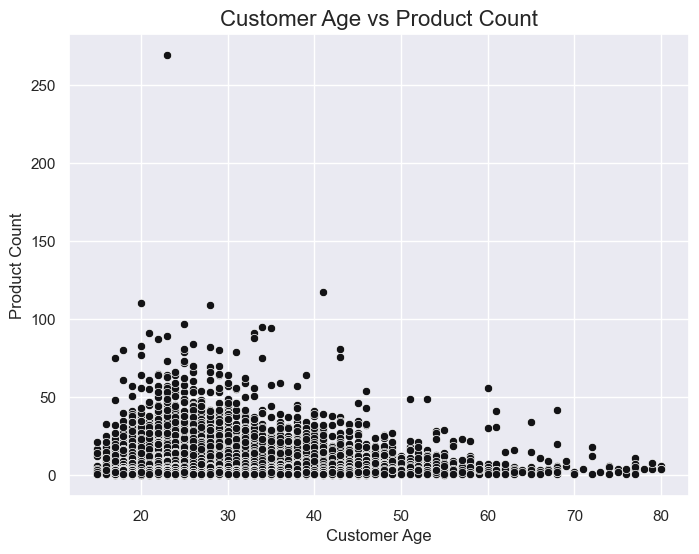

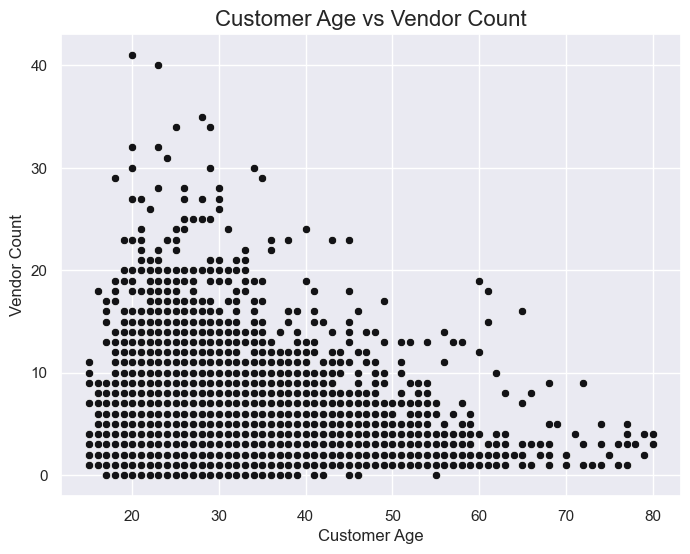

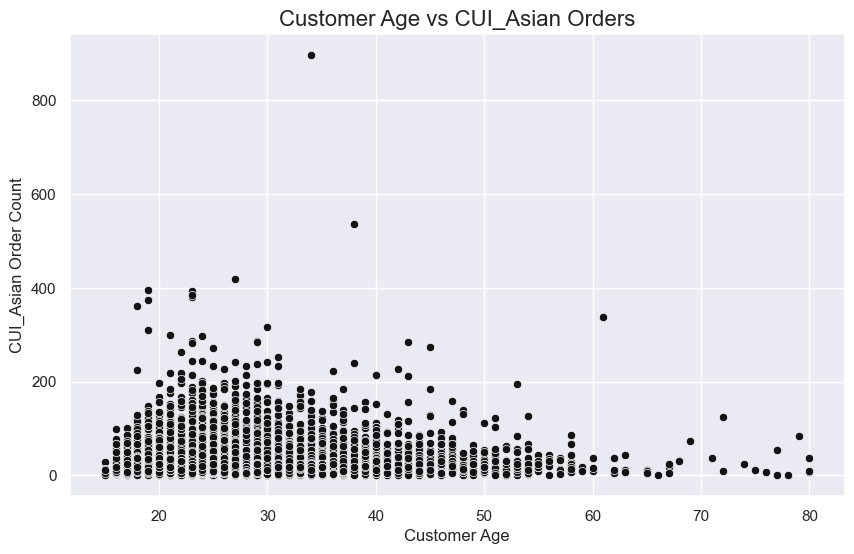

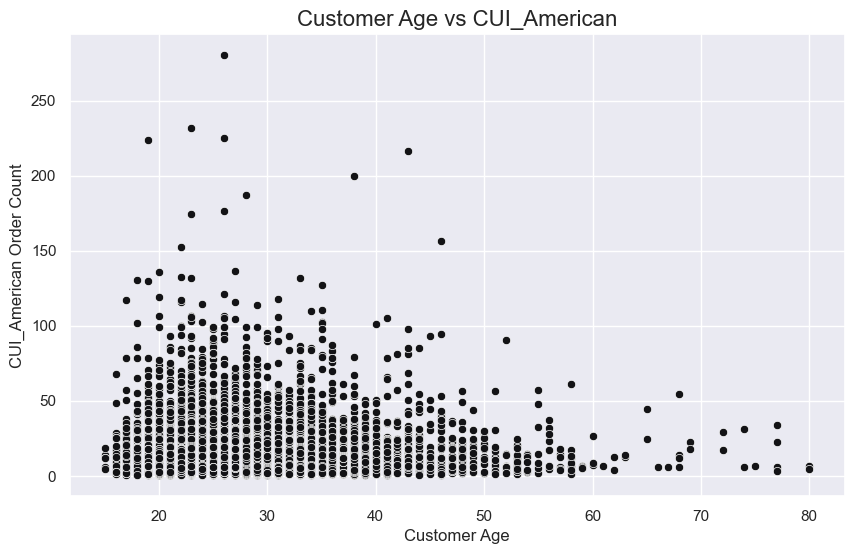

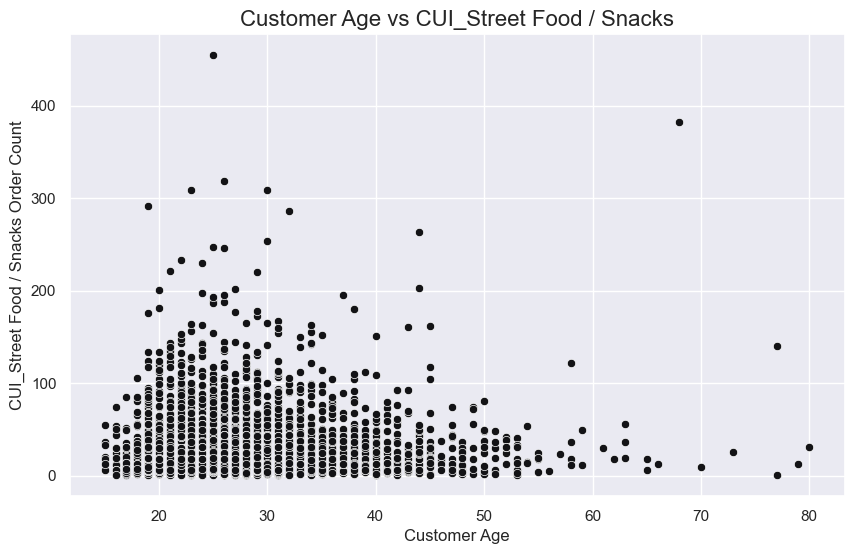

In [40]:
# Scatter plot: Customer Age vs Product Count
plt.figure(figsize=(8, 6))  # Set the figure size for the plot
sns.scatterplot(data=df, x='customer_age', y='product_count', color="#131316")  # Create a scatter plot
plt.title('Customer Age vs Product Count', fontsize=16)  # Title for context
plt.xlabel('Customer Age', fontsize=12)  # X-axis label
plt.ylabel('Product Count', fontsize=12)  # Y-axis label
plt.show()  # Display the plot

# Scatter plot: Customer Age vs Vendor Count
plt.figure(figsize=(8, 6))  # Set the figure size for the plot
sns.scatterplot(data=df, x='customer_age', y='vendor_count', color="#131316")  # Create a scatter plot
plt.title('Customer Age vs Vendor Count', fontsize=16)  # Title for context
plt.xlabel('Customer Age', fontsize=12)  # X-axis label
plt.ylabel('Vendor Count', fontsize=12)  # Y-axis label
plt.show()  # Display the plot

# Box plot: Customer Age vs Popular Cuisines (Low, Medium, High)
# Filter data for non-zero CUI_Asian counts
df_cui_asian = df[df['CUI_Asian'] > 0]  # Dataframe for Asian cuisine
df_cui_american = df[df['CUI_American'] > 0]  # Dataframe for American cuisine
df_cui_street = df[df['CUI_Street Food / Snacks'] > 0]  # Dataframe for Street Food cuisine

# Scatter plot of customer_age vs CUI_Asian
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
sns.scatterplot(data=df_cui_asian, x='customer_age', y='CUI_Asian', color="#131316")  # Create a scatter plot
plt.title('Customer Age vs CUI_Asian Orders', fontsize=16)  # Title for context
plt.xlabel('Customer Age', fontsize=12)  # X-axis label
plt.ylabel('CUI_Asian Order Count', fontsize=12)  # Y-axis label
plt.show()  # Display the plot

# Scatter plot of customer_age vs CUI_American
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
sns.scatterplot(data=df_cui_american, x='customer_age', y='CUI_American', color="#131316")  # Create a scatter plot
plt.title('Customer Age vs CUI_American', fontsize=16)  # Title for context
plt.xlabel('Customer Age', fontsize=12)  # X-axis label
plt.ylabel('CUI_American Order Count', fontsize=12)  # Y-axis label
plt.show()  # Display the plot

# Scatter plot of customer_age vs CUI_Street Food / Snacks
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
sns.scatterplot(data=df_cui_street, x='customer_age', y='CUI_Street Food / Snacks', color="#131316")  # Create a scatter plot
plt.title('Customer Age vs CUI_Street Food / Snacks', fontsize=16)  # Title for context
plt.xlabel('Customer Age', fontsize=12)  # X-axis label
plt.ylabel('CUI_Street Food / Snacks Order Count', fontsize=12)  # Y-axis label
plt.show()  # Display the plot

## Bar Chart of Total Orders from All Cuisines by Customer Age

### Summary for Total Orders by Customer Age:
- This bar chart illustrates the total orders across all cuisines, segmented by customer age.
- It enables the identification of age demographics that contribute most to overall cuisine orders, highlighting customer preferences.

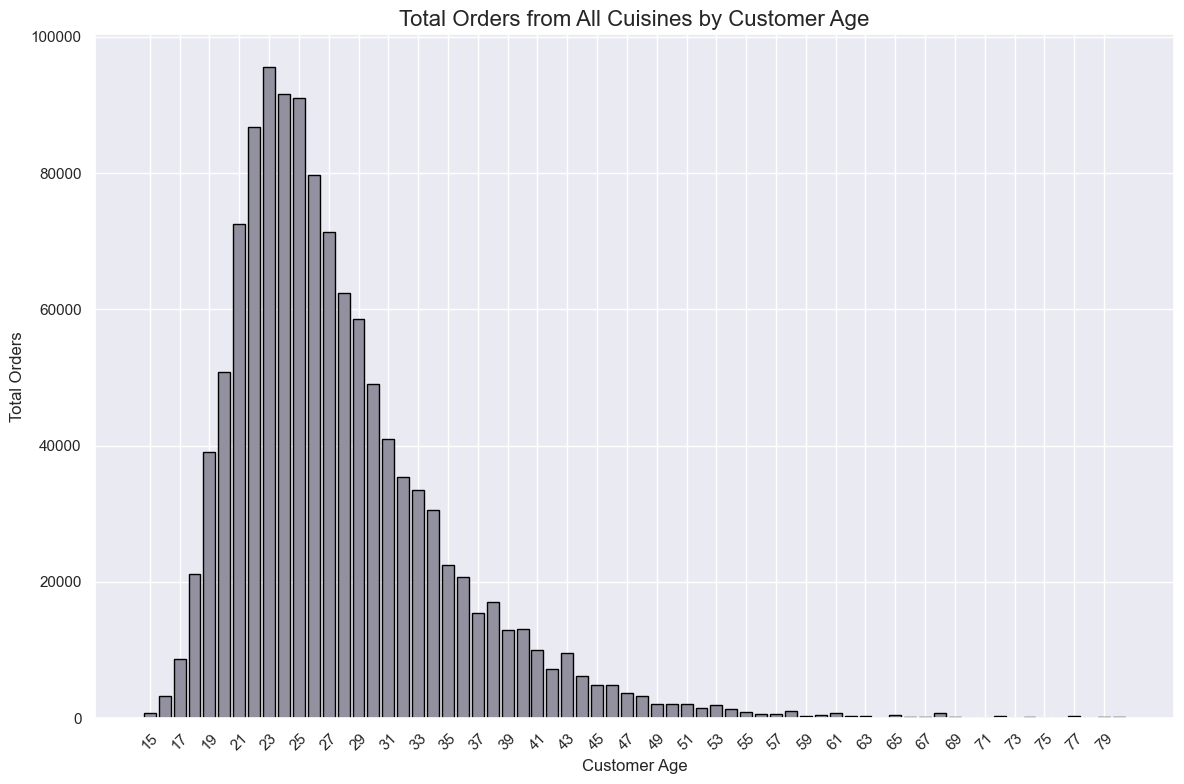

In [41]:
# List of all cuisine columns, including the combined CUI_OTHER
cuisine_columns = [col for col in df.columns if 'CUI_' in col]  # Replace with actual cuisine column names

# Calculate total orders by summing across all cuisine columns
df['total_orders'] = df[cuisine_columns].sum(axis=1)

# Group by customer age and sum total orders for each age group
orders_by_age = df.groupby('customer_age')['total_orders'].sum()

# Plotting the total orders by customer age as a bar chart
plt.figure(figsize=(12, 8))  # Set the figure size for better visibility
plt.bar(orders_by_age.index, orders_by_age.values, color='#9391A0', edgecolor = 'black')  # Use the specified color for the bars
plt.title("Total Orders from All Cuisines by Customer Age", fontsize=16)  # Title for context
plt.xlabel("Customer Age", fontsize=12)  # X-axis label
plt.ylabel("Total Orders", fontsize=12)  # Y-axis label
age_range = range(int(orders_by_age.index.min()), int(orders_by_age.index.max()) + 1, 2)  # Create a range for x-ticks
plt.xticks(age_range, rotation=45)  # Rotate x-ticks for readability
plt.tight_layout()  # Adjust layout for better presentation
plt.show()  # Display the plot